In [1]:
import os
# Change the current working directory to the Desktop
os.chdir(r'C:\Users\91990\Desktop')
# Verify the current working directory
print("Current Directory:", os.getcwd())



!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_md

!pip uninstall numpy -y
!pip install numpy==1.23.5


Current Directory: C:\Users\91990\Desktop
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp310-cp310-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp310-cp310-win_amd64.whl (15.9 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 0.32.1 requires numpy<2.0.0,>=1.17, but you have numpy 2.0.2 which is incompatible.
chromadb 0.5.4 requires numpy<2.0.0,>=1.22.5, but you have numpy 2.0.2 which is incompatible.
langchain 0.2.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
langchain-community 0.2.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
llama-index-core 0.10.55 requires numpy<2.0.0, but you have numpy 2.0.2 which is incompatible.
onnxruntime 1.18.1 requires numpy<2.0,>=1.21.6, but you have numpy 2.0.2 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 2.0.2 which is incompatible.
scipy 1.10.1

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     - -------------------------------------- 1.0/33.5 MB 6.3 MB/s eta 0:00:06
     -- ------------------------------------- 1.8/33.5 MB 4.8 MB/s eta 0:00:07
     --- ------------------------------------ 2.6/33.5 MB 4.6 MB/s eta 0:00:07
     ---- ----------------------------------- 3.7/33.5 MB 4.4 MB/s eta 0:00:07
     ----- ---------------------------------- 4.5/33.5 MB 4.3 MB/s eta 0:00:07
     ------ --------------------------------- 5.2/33.5 MB 4.2 MB/s eta 0:00:07
     ------- -------------------------------- 6.0/33.5 MB 4.1 MB/s eta 0:00:07
     -------- ------------------------------- 6.8/33.5 MB 4.2 MB/s eta 0:00:07
     --------- ------------------------------ 7.6/33.5 MB 4.1 MB/s eta 0:00:07
     ---------- ----------------------------- 8.4/33.5 MB 4.1 MB/s eta 0:00:07
     ----------- ---------------------------- 9.4/33.5 MB 4.

In [2]:
import rdflib
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
from datetime import datetime


# Download necessary NLTK resources
download('punkt')
download('stopwords')







[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import os
import pandas as pd

# Check the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# **Step : Data Collection**
# Load the CSV file into a dataframe
df1 = pd.read_csv(os.path.join(current_directory, 'text_data.csv'))  # Load first big file

# Concatenate all dataframes (if you have multiple dataframes to concatenate, you can add them here)
df = pd.concat([df1, ], ignore_index=True)
print("Data Shape after loading:", df.shape)

# **Step : Retain only unique values in the 'Text0' column**
df = df.drop_duplicates(subset='Text0', keep='first')
print("Data Shape after removing duplicates:", df.shape)

# **Step : Remove rows where any column is empty**
df = df.dropna()  # This removes all rows with any NaN values in any column
print("Data Shape after removing rows with any empty values:", df.shape)

# **Step : Convert the 'Date' column to datetime format including time**
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M')  # Adjust the format for date and time

# **Step : Create additional columns for 'Date' and 'Time'**
df['Date_only'] = df['Date'].dt.date  # Extract the date part
df['Time_only'] = df['Date'].dt.time  # Extract the time part

# **Step : Filter rows for May 2021 to August 2021**
df_may_to_aug = df[(df['Date'] >= '2021-05-01') & (df['Date'] <= '2021-08-31')]

# **Step : Filter rows for September 2021 to October 2021**
df_sep_oct = df[(df['Date'] >= '2021-09-01') & (df['Date'] <= '2021-10-31')]

# Print the first few rows to verify
print(df_may_to_aug.shape)
print(df_sep_oct.shape)

# **Step : Save the filtered DataFrames as CSVs in the current directory**
#df_may_to_aug.to_csv(os.path.join(current_directory, 'df_may_to_aug.csv'), index=False)
#df_sep_oct.to_csv(os.path.join(current_directory, 'df_sep_oct.csv'), index=False)

# **Step : Print the first row and shape of the DataFrame after selection**
print(df_may_to_aug.head(1))
print(f"Shape of selected rows: {df_may_to_aug.shape}")

# **Step : Update df with the selected rows**
df = df_may_to_aug

# **Step : Check if there are any null values left in any columns**
null_values = df.isnull().sum()
print("\nNull values in each column after processing:")
print(null_values)

# If any column has null values, display a message
if null_values.any():
    print("\nThere are still null values in some columns.")
else:
    print("\nNo null values found in any column.")


Current working directory: C:\Users\91990\Desktop
Data Shape after loading: (1220, 3)
Data Shape after removing duplicates: (965, 3)
Data Shape after removing rows with any empty values: (964, 3)
(959, 5)
(5, 5)
                                               Text0  RT_Like  \
0  So Biden should have said dont take the vaccin...      0.0   

                 Date   Date_only Time_only  
0 2021-05-02 12:45:00  2021-05-02  12:45:00  
Shape of selected rows: (959, 5)

Null values in each column after processing:
Text0        0
RT_Like      0
Date         0
Date_only    0
Time_only    0
dtype: int64

No null values found in any column.


In [4]:
slang_lexicon = {
    "feel like shit": [
        "fatigue", "muscle aches", "general malaise", "feeling rundown", "exhaustion", "lack of energy", "overall weakness",
        "unwell", "drained", "debilitated", "feeling awful", "utterly fatigued", "feeling terrible"
    ],
    "the vaccine is a shield against the storm": [
        "protection", "immunization", "disease prevention"
    ],
    "i feel like i’ve been run over by a truck": [
        "muscle sore", "fatigue", "body ache"
    ],
    "the covid-19 crisis is spreading like wildfire": [
        "rapid spread", "widespread transmission", "accelerated infection rate"
    ],
    "i’ve seen a million posts about vaccine side effects": [
        "large volume of posts", "information overload", "overwhelming number of reports"
    ],
    "the virus is playing hide and seek": [
        "virus evasion", "difficult to track"
    ],
    "the vaccine is our hero in this fight": [
        "vaccine effectiveness", "heroic response"
    ],
    "nothing like waiting in line for hours to get the vaccine that will save us all": [
        "long wait times", "vaccine access delay", "inconvenience of vaccination process"
    ],
    "vaccinating the world is like building the great wall of china": [
        "large-scale vaccination effort", "extensive public health campaign"
    ],
    "yeah, the vaccine’s side effects are just a little inconvenient": [
        "mild side effects", "tolerable discomfort", "temporary symptoms"
    ],
    "let’s vaccine and chill": [
        "call to vaccinate", "relaxation after vaccination"
    ],
    "the vaccine distribution was an organized chaos": [
        "coordinated but challenging distribution", "efficient yet overwhelmed system"
    ],
    "we’re in the homestretch now, just waiting on the vaccine": [
        "final stages of vaccine rollout", "awaiting vaccine availability"
    ],
    "drained": [
        "exhausted", "wiped out", "hit by a truck", "wrecked", "feeling rundown", "heavy", "sluggish", "foggy", "dizzy", "sore"
    ],
    "weary": [
        "fatigue", "drained", "worn out", "sleep-deprived", "exhausted", "tired", "depleted", "low energy", "sluggish", "lethargic"
    ],
    "feeling flushed": [
        "feeling hot", "feeling feverish", "overheated"
    ],
    "feeling blue": [
        "feeling emotionally low", "feeling down", "mood swings"
    ],
    "feeling under the weather": [
        "feeling sick", "feeling unwell", "general malaise"
    ],
    "feeling spacey": [
        "dizziness", "lightheadedness", "giddiness"
    ]
}



known_symptoms = [
    # Physical Symptoms (Direct)
    'fatigue', 'fever', 'headache', 'muscle aches', 'sore arm', 'chills', 'nausea', 'dizziness',
    'shortness of breath', 'drowsiness', 'sweating', 'stomach cramps', 'joint pain', 'back pain',
    'body aches', 'weakness', 'sore throat', 'feeling feverish', 'brain fog', 'migraines',
    'shivering', 'muscle stiffness', 'redness at injection site',
    # Emotional/Mood Symptoms
    'mood swings', 'irritability', 'feeling down', 'emotional instability', 'feeling emotionally low',
    'feeling overwhelmed', 'feeling anxious', 'feeling on edge', 'feeling blue', 'feeling out of sorts',
    'mood fluctuations',
    # Sleep-Related Symptoms
    'sleepiness', 'excessive sleepiness', 'tiredness', 'trouble sleeping', 'sleep-deprived', 'feeling drowsy',
    # Abdominal/Gastrointestinal Symptoms
    'upset stomach', 'bloating', 'gassy', 'intestinal discomfort', 'stomach discomfort', 'gastritis', 'heartburn',
    'abdominal cramps', 'gastrointestinal distress', 'stomach queasiness',
    # Injection-Specific Symptoms
    'arm soreness', 'injection site pain', 'pain at injection site', 'muscle tightness', 'inflammation at injection site',
    'redness at injection site', 'tender arm', 'deltoid pain', 'injection site swelling',
    # Other/General Symptoms
    'feeling hot', 'sensitive scalp', 'neck tension', 'dehydration', 'feeling unwell', 'feeling sick',
    'giddiness', 'dry mouth', 'hunger', 'uncontrollable shaking', 'lightheaded',
    'head pressure', 'neck stiffness', 'sweaty palms',
    # Extreme Symptoms (Severe or Unexpected)
    'feeling like passing out', 'feeling faint', 'feeling incapacitated', 'feeling like collapsing',
    'feeling weak to the point of immobility', 'difficulty breathing', 'unable to move',
    'extreme fatigue', 'extreme tiredness', 'muscle spasms'
]






uncommon_vaccine_side_effects_lexicon = [
    "myocarditis", "thrombosis", "blood clots", "anaphylaxis", "heart inflammation",
    "vaccine-induced immune response", "neurological disorders", "autoimmune disease",
    "severe headache", "persistent fever", "unusual bleeding", "rash", "hives",
    "blood pressure", "paralysis", "dizziness", "shortness of breath", "arrhythmia",
    "nausea", "fatigue", "chest pain", "pericarditis", "guilain-barre syndrome",
    "shingles", "stroke", "hemorrhagic fever", "myositis"
]





time_patterns = [
    # Patterns for Analysis related to Vaccines
    r"(not\s*get\s*vaccine)",
    r"(not\s*believe\s*in\s*vaccine)",
    r"(vaccine\s*(has\s*no\s*side\s*effects|was\s*effective))",
    r"(vaccine\s*(should\s*be\s*mandatory|should\s*be\s*choice))",
    r"(i\s*(am\s*scared|am\s*hesitant)\s*about\s*vaccine)",
    r"(vaccine\s*does\s*not\s*prevent\s*covid)",
    r"(vaccine\s*gave\s*me\s*side\s*effects)",
    r"(vaccine\s*is\s*a\s*choice\s*not\s*a\s*mandate)",
    r"(vaccine\s*(is\s*helping|has\s*been\s*effective))",
    r"(vaccine\s*has\s*caused\s*issues|vaccine\s*causes\s*harm)",
    r"(vaccine\s*is\s*safe|vaccine\s*has\s*worked\s*for\s*me)",
    r"(vaccine\s*(does\s*not\s*work|does\s*not\s*prevent\s*covid))",
    r"(not\s*going\s*to\s*take\s*vaccine)",
    r"(vaccine\s*has\s*side\s*effects\s*(but\s*still\s*taking\s*it|had\s*no\s*problem))",
    r"(do\s*not\s*want\s*the\s*vaccine)",
    r"(vaccinated\s*and\s*still\s*get\s*covid)",
    r"(side\s*effects\s*from\s*vaccine)",
    r"(i\s*feel\s*confident\s*after\s*vaccine)",
    r"(it\s*worked\s*for\s*me\s*but\s*not\s*for\s*everyone)",
    r"(still\s*believe\s*vaccine\s*works)",
    r"(hesitant\s*about\s*vaccine\s*but\s*getting\s*it)",
    r"(vaccine\s*should\s*be\s*voluntary)",
    r"(vaccine\s*does\s*not\s*prevent\s*certain\s*strains)",
    r"(there\s*are\s*issues\s*with\s*vaccine)",
    r"(vaccine\s*is\s*a\s*choice\s*for\s*individuals)",

    # Alert keywords added to the time_patterns lexicon
    r"(threat)",  # Alert term: life-threatening
    r"(emergency)",  # Alert term: emergency
    r"(ICU)",  # Alert term: ICU
    r"(death)",  # Alert term: death

    # Mandate and Forced Vaccine (Mandate is forced and unwanted)
    r"((vaccine\s*mandates\s*(are|should\s*be)\s*(necessary|unnecessary|unconstitutional|forced|wrong)|vaccine\s*passport\s*(is|should\s*be)\s*(illegal|unethical|infringing|wrong)))",

    # Negation of Vaccine Mandates
    r"(\b(not\s*enough\s*vaccine\s*availability|vaccine\s*mandates\s*should\s*not\s*be\s*forced|vaccine\s*mandates\s*should\s*be\s*optional))",

    # Personal choice & free will
    r"((vaccine\s*is\s*personal\s*choice|vaccine\s*(should\s*not\s*be)\s*forced|vaccine\s*is\s*optional))",

    # Positive (Belief in Science/Trust in Vaccine)
    r"(vaccine\s*is\s*backed\s*by\s*science|vaccine\s*reduces\s*infection\s*risk|vaccine\s*(protects|saves)\s*lives|vaccine\s*is\s*scientifically\s*proven)",

    # Negative (Skepticism about Science/Belief)
    r"(vaccine\s*is\s*unproven|vaccine\s*is\s*unsafe|vaccine\s*is\s*experimental|vaccine\s*is\s*just\s*political)",

    # terms where "not" negates positive claims (e.g., negating vaccine benefits)
    r"(\bnot\s*effective\s*against\s*covid|vaccine\s*does\s*not\s*prevent\s*covid|vaccine\s*does\s*not\s*reduce\s*spread)",

    # Mixed terms (Vaccination + Side effects)
    r"(vaccine\s*has\s*side\s*effects\s*(but\s*is\s*still\s*necessary|and\s*is\s*worth\s*the\s*risks|and\s*is\s*minor\s*compared\s*to\s*disease))",

    # Terms in Relation to Specific Groups (vaccine is important for some people, not for others)
    r"(vaccine\s*is\s*important\s*for\s*(health\s*care\s*workers|elderly|those\s*with\s*pre-existing\s*conditions|high\s*risk\s*populations))",

    # Terms on Covid & Vaccine Benefits
    r"(covid\s*is\s*real\s*and\s*vaccine\s*is\s*important|covid\s*should\s*not\s*be\s*taken\s*lightly|covid\s*can\s*kill\s*and\s*vaccine\s*helps)",
    r"(covid\s*is\s*serious|covid\s*can\s*be\sdangerous|covid\s*has\s*changed\s*the\s*world|covid\s*is\s*a\s*threat)",

    # Patterns related to concerns and skepticism but open to vaccination
    r"(concerned\s*about\s*vaccine\s*but\s*still\s*getting\s*it)",
    r"(vaccine\s*has\s*risks\s*but\s*is\s*necessary)",
    r"(unsure\s*about\s*vaccine\s*but\s*still\s*considering\s*it)",

    # Positive term with no negation
    r"(?i)(HOORAY\s*FOR\s*BEING|feel\s*good|feel\s*great|thanks\s*for\s*the\s*compliment|good\s*day|thank\s*you|love|works\s*for\s*me|exited|built\s*different|feel\s*like\s*doing|positive\s*effect)",

    # Negative term Patterns
    r"(?i)(won't\s*work|isn't\s*needed|don't\s*think|can't\s*believe|never\s*going\s*back|no\s*way\s*to\s*prove|does\s*not\s*work|not\s*safe|bad\s*side\s*effects|problem\s*with\s*vaccine|not\s*effective|failure\s*of)",

    # Patterns for negation
    r"(?i)(not\s*work|not\s*happy|not\s*good|can't\s*be|never\s*needed|don't\s*agree|can't\s*accept|didn't\s*feel|won't\s*agree|don't\s*like|not\s*comfortable)",
    r"(?i)(no\s*problem|no\s*side\s*effects|no\s*issues|won't\s*affect|not\s*concerned|didn't\s*mind|don't\s*care|not\s*worried)",

    # Detect negation flipping positive term
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(positive|great|safe|effective|good|happy)\b",
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(works|help|successful)\b",

    # Detect negation flipping negative term
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(bad|problem|failure|wrong|negative)\b",
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(worst|issue|failed|sucks|hate)\b",

    # Time patterns for days, hours, minutes before
    r"(\d+\s*(day|days|hour|hours|minute|minutes)\s*before)",  # E.g., 3 days before, 5 hours before
    r"(in\s*(\d+\s*(day|days|hour|hours|minute|minutes))\s*before)",  # E.g., in 3 days before
    r"(just\s*before\s*(\d+\s*(day|days|hour|hours|minute|minutes)))",  # E.g., just before 2 hours
    r"(before\s*(\d+\s*(day|days|hour|hours|minute|minutes)))",  # E.g., before 1 minute
    r"(\d+\s*(second|seconds)\s*ago)",  # E.g., 10 seconds ago
    r"(\d+\s*(minute|minutes)\s*ago)",  # E.g., 5 minutes ago
    r"(\d+\s*(hour|hours)\s*ago)",  # E.g., 2 hours ago
    r"(\d+\s*(day|days)\s*ago)",  # E.g., 3 days ago
    r"(\d+\s*(week|weeks)\s*ago)",  # E.g., 1 week ago
    r"(just\s*now)",  # Just now
]




# Define a human-readable label for each time pattern
time_pattern_labels = {
    r"(not\s*get\s*vaccine)": "Negative Term",
    r"(not\s*believe\s*in\s*vaccine)": "Negative Term",
    r"(vaccine\s*(has\s*no\s*side\s*effects|was\s*effective))": "Positive Term",
    r"(vaccine\s*(should\s*be\s*mandatory|should\s*be\s*choice))": "Mandate & Choice",
    r"(i\s*(am\s*scared|am\s*hesitant)\s*about\s*vaccine)": "Hesitation/Side Effects",
    r"(vaccine\s*does\s*not\s*prevent\s*covid)": "Negative Term",
    r"(vaccine\s*gave\s*me\s*side\s*effects)": "Hesitation/Side Effects",
    r"(vaccine\s*is\s*a\s*choice\s*not\s*a\s*mandate)": "Choice & Mandates",
    r"(vaccine\s*(is\s*helping|has\s*been\s*effective))": "Positive Term",
    r"(vaccine\s*has\s*caused\s*issues|vaccine\s*causes\s*harm)": "Negative Term",
    r"(vaccine\s*is\s*safe|vaccine\s*has\s*worked\s*for\s*me)": "Positive Term",
    r"(vaccine\s*(does\s*not\s*work|does\s*not\s*prevent\s*covid))": "Negative Term",
    r"(not\s*going\s*to\s*take\s*vaccine)": "Negative Term",
    r"(vaccine\s*has\s*side\s*effects\s*(but\s*still\s*taking\s*it|had\s*no\s*problem))": "Hesitation/Side Effects",
    r"(do\s*not\s*want\s*the\s*vaccine)": "Negative Term",
    r"(vaccinated\s*and\s*still\s*get\s*covid)": "Negative Term",
    r"(side\s*effects\s*from\s*vaccine)": "Hesitation/Side Effects",
    r"(i\s*feel\s*confident\s*after\s*vaccine)": "Positive Term",
    r"(it\s*worked\s*for\s*me\s*but\s*not\s*for\s*everyone)": "Hesitation/Side Effects",
    r"(still\s*believe\s*vaccine\s*works)": "Positive Term",
    r"(hesitant\s*about\s*vaccine\s*but\s*getting\s*it)": "Hesitation/Side Effects",
    r"(vaccine\s*should\s*be\s*voluntary)": "Mandate & Choice",
    r"(vaccine\s*does\s*not\s*prevent\s*certain\s*strains)": "Negative Term",
    r"(there\s*are\s*issues\s*with\s*vaccine)": "Negative tERM",
    r"(vaccine\s*is\s*a\s*choice\s*for\s*individuals)": "Choice & Mandates",
    # Mixed
    r"(vaccine\s*has\s*side\s*effects\s*(but\s*is\s*still\s*necessary|and\s*is\s*worth\s*the\s*risks|and\s*is*minor\s*compared\s*to\s*disease))": "Mixed",
    # Specific Groups
    r"(vaccine\s*is\s*important\s*for\s*(health\s*care\s*workers|elderly|those\s*with\s*pre-existing\s*conditions|high\s*risk\s*populations))": "Specific Groups",
    # Covid & Vaccine Benefits
    r"(covid\s*is\s*real\s*and\s*vaccine\s*is\s*important|covid\s*should\s*not\s*be\s*taken\s*lightly|covid\s*can\s*kill\s*and\s*vaccine\s*helps)": "Covid & Vaccine Benefits",
    r"(covid\s*is\s*serious|covid\s*can\s*be\sdangerous|covid\s*has\s*changed\s*the\s*world|covid\s*is\s*a\s*threat)": "Covid & Vaccine Benefits",
    # Concerns but Open
    r"(concerned\s*about\s*vaccine\s*but\s*still\s*getting\s*it)": "Open to Vaccine",
    r"(vaccine\s*has\s*risks\s*but\s*is\s*necessary)": "Open to Vaccine",
    r"(unsure\s*about\s*vaccine\s*but\s*still\s*considering\s*it)": "Open to Vaccine",
    # Positive
    r"(?i)(HOORAY\s*FOR\s*BEING|feel\s*good|feel\s*great|thanks\s*for\s*the\s*compliment|good\s*day|thank\s*you|love|works\s*for\s*me|exited|built\s*different|feel\s*like\s*doing|positive\s*effect)": "Positive Term",
    # Negative
    r"(?i)(won't\s*work|isn't\s*needed|don't\s*think|can't\s*believe|never\s*going\s*back|no\s*way\s*to\s*prove|does\s*not\s*work|not\s*safe|bad\s*side\s*effects|problem\s*with\s*vaccine|not\s*effective|failure\s*of)": "Negative Term",
    # Negation
    r"(?i)(not\s*work|not\s*happy|not\s*good|can't\s*be|never\s*needed|don't\s*agree|can't\s*accept|didn't\s*feel|won't\s*agree|don't\s*like|not\s*comfortable)": "Negation",
    r"(?i)(no\s*problem|no\s*side\s*effects|no\s*issues|won't\s*affect|not\s*concerned|didn't\s*mind|don't\s*care|not\s*worried)": "Negation",
    # Negation flipping
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(positive|great|safe|effective|good|happy)\b": "Negation Flipping",
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(works|help|successful)\b": "Negation Flipping",
    # Negation flipping
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(bad|problem|failure|wrong|negative)\b": "Negation Flipping",
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(worst|issue|failed|sucks|hate)\b": "Negation Flipping",
}







alert_keywords = [
    "critical",
    "severe",
    "urgent",
    "resuscitation",
    "code blue",
    "intensive care",
    "collapsed",
    "cardiac arrest",
    "stroke",
    "trauma",
    "collapse",
    "anaphylaxis",
    "shock",
    "crisis",
    "life-threatening",
    "urgency",
    "respiratory failure",
    "unresponsive",
    "sepsis",
    "hypoxia",
    "hemorrhage",
    "cardiopulmonary arrest",
    "overdose",
    "coma",
    "deteriorating condition",
    "obstruction",
    "severe pain",
    "acute",
    "malfunction",
    "choking",
    "viral outbreak",
    "paralysis",
    "collapsed lung",
    "arrest",
    "suffocation",
    "bleeding",
    "emergency",
    "icu",
    "death",
    "threat",
]


severity_mapping = {
    'headache': 1,
    'sore arm': 1,
    'dizziness': 1,
    'nausea': 1,
    'fatigue': 1,
    'brain fog': 1,
    'muscle aches': 1,
    'chills': 1,
    'feeling unwell': 1,
    'fever': 2,
    'muscle soreness': 2,
    'joint pain': 2,
    'shortness of breath': 2,
    'extreme fatigue': 3,
    'myocarditis': 3,
    'stroke': 4,
    'death': 5,
    'critical': 0,
    'severe': 0,
    'urgent': 0,
    'resuscitation': 0,
    'code blue': 0,
    'intensive care': 0,
    'collapsed': 0,
    'cardiac arrest': 0,
    'trauma': 0,
    'collapse': 0,
    'anaphylaxis': 0,
    'shock': 0,
    'crisis': 0,
    'life-threatening': 0,
    'urgency': 0,
    'respiratory failure': 0,
    'unresponsive': 0,
    'sepsis': 0,
    'hypoxia': 0,
    'hemorrhage': 0,
    'cardiopulmonary arrest': 0,
    'overdose': 0,
    'coma': 0,
    'deteriorating condition': 0,
    'obstruction': 0,
    'severe pain': 0,
    'acute': 0,
    'malfunction': 0,
    'choking': 0,
    'viral outbreak': 0,
    'paralysis': 0,
    'collapsed lung': 0,
    'arrest': 0,
    'suffocation': 0,
    'bleeding': 0,
    'emergency': 0,
    'icu': 0,
    'death': 5,
    'threat': 0
}



In [5]:
import re
import numpy as np

# Function to clean the tweet text, removing unwanted characters, URLs, etc.
def clean_text(text):
    # Ensure the input is a string (if not, convert it to an empty string or use a default)
    if not isinstance(text, str):
        return ""  # Return an empty string instead of NaN for non-string values

    # Remove URLs (http, www, https)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove special characters, numbers, and keep only alphabets and spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra spaces between words
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert text to lowercase
    text = text.lower()

    # Return cleaned text
    return text



df['cleaned_text'] = df['Text0'].apply(lambda x: clean_text(x))


# Function to normalize slang
def normalize_slang(text):
    if not isinstance(text, str):  # Check if the text is a string
        return []  # Return an empty list if it's not a string

    for slang, symptoms in slang_lexicon.items():
        if slang in text:
            return symptoms
    return []

# Apply slang normalization
df['normalized_symptoms'] = df['cleaned_text'].apply(normalize_slang)









# Convert the 'Date' column to datetime (specifying the format as MM/DD/YYYY)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract year, month, day, hour, and minute from the 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour  # 'hour' instead of 'Hours'

# Combine Year, Month, Day, Hour, and Minute columns into a datetime object
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Extract hour and day of the week from the 'datetime' column
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

df.head(1)













,Text0,RT_Like,Date,Date_only,Time_only,cleaned_text,normalized_symptoms,year,month,day,hour,datetime,day_of_week
0,So Biden should have said dont take the vaccin...,0.0,2021-05-02 12:45:00,2021-05-02,12:45:00,so biden should have said dont take the vaccin...,[],2021,5,2,12,2021-05-02 12:00:00,Sunday


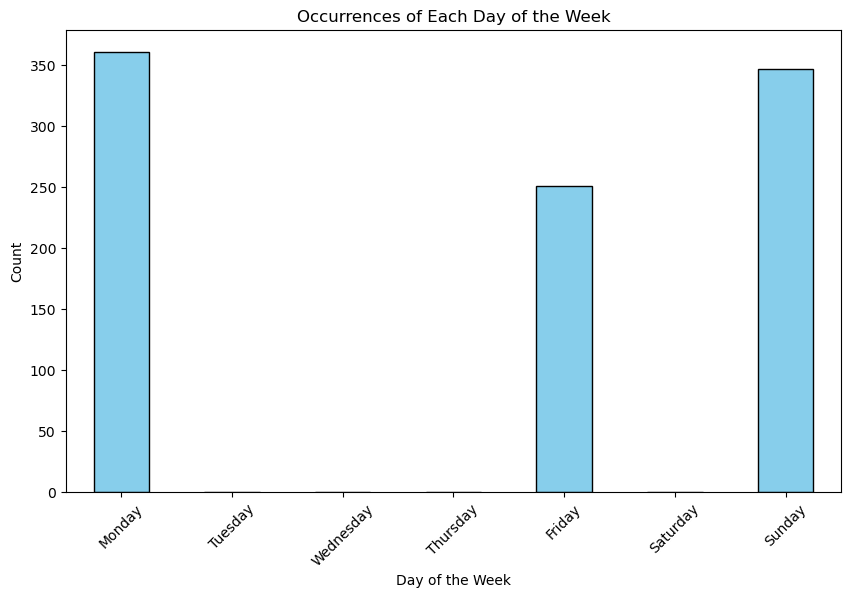

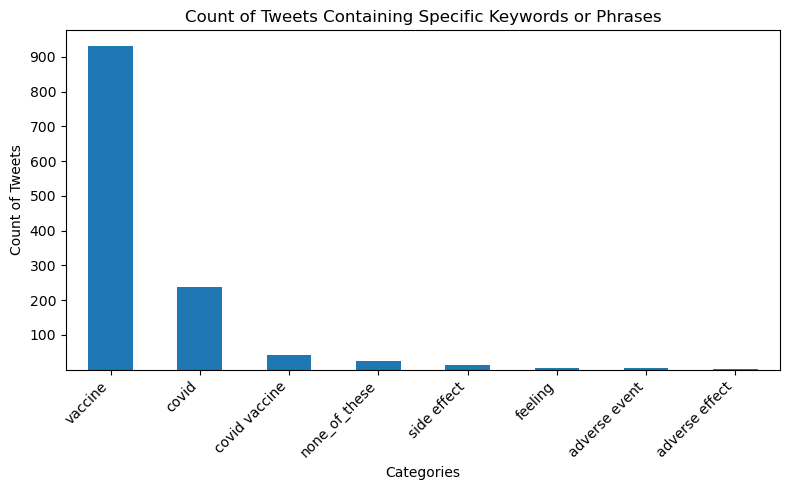

Total count of words starting with # in the entire 'Text0' column: 0


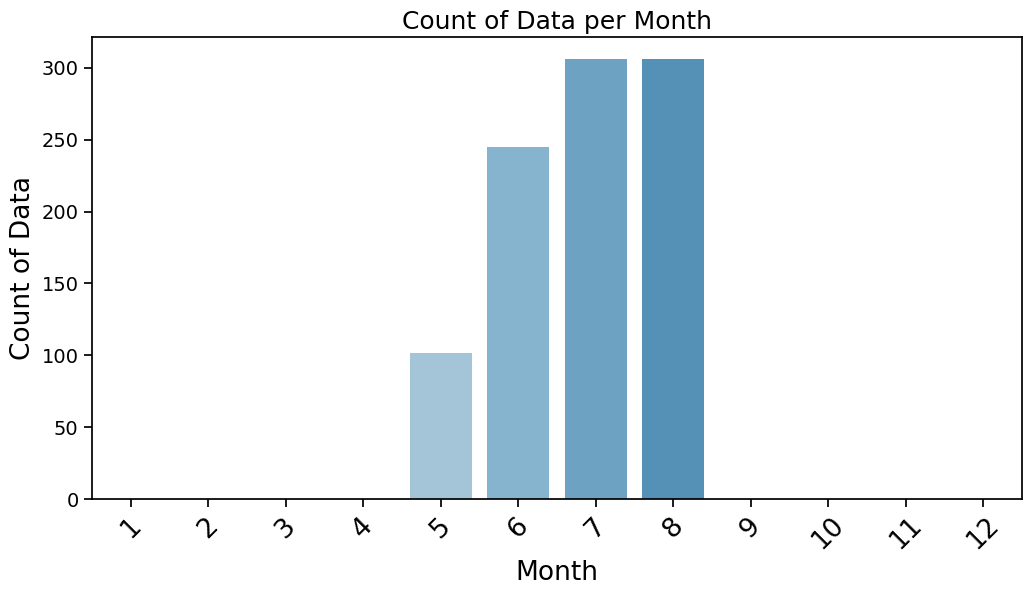

positive    497
negative    287
neutral     175
Name: sentiment, dtype: int64
                                          cleaned_text sentiment
488  guy doesn t understand that the vaccine would ...  positive
25   linda you re required to vaccinate your childr...  positive
635  s without an economy there is nothing the viru...  positive
824  i have freinds who fainted because they were s...  positive
807  they wanted ppe to prevent covid so their not ...  positive


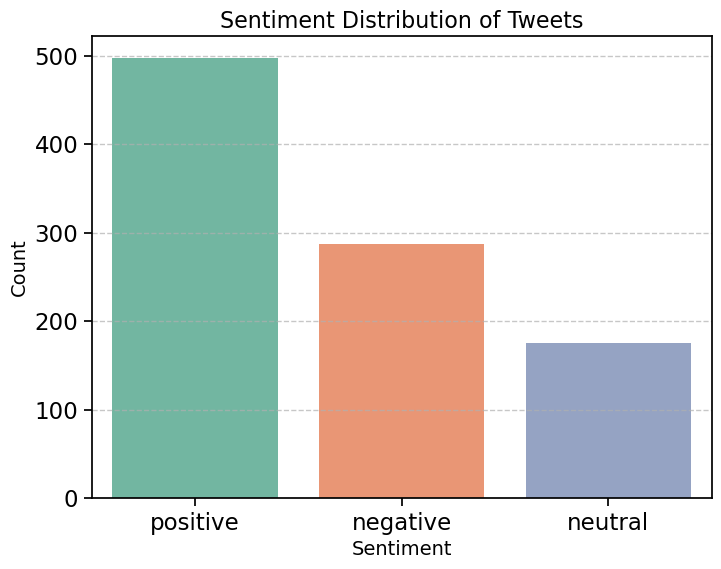

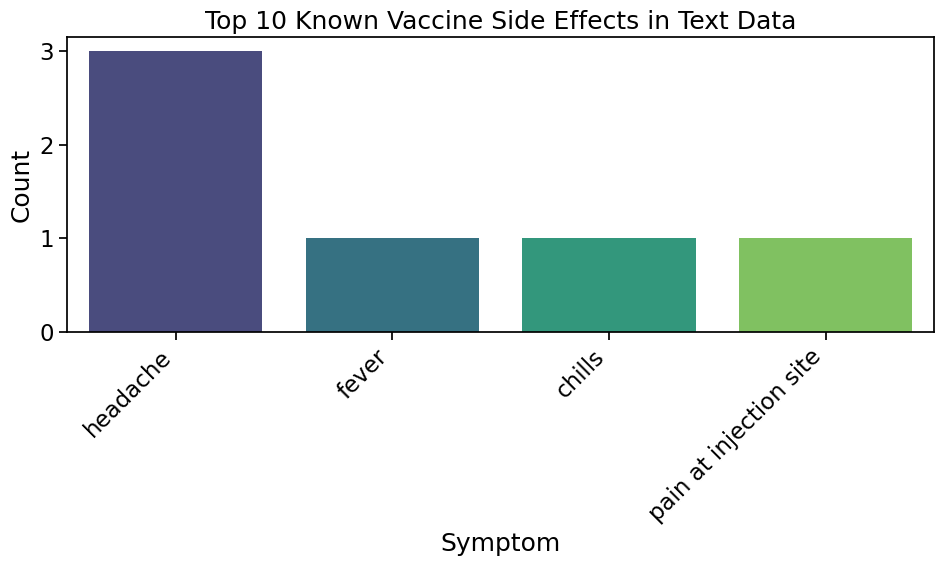

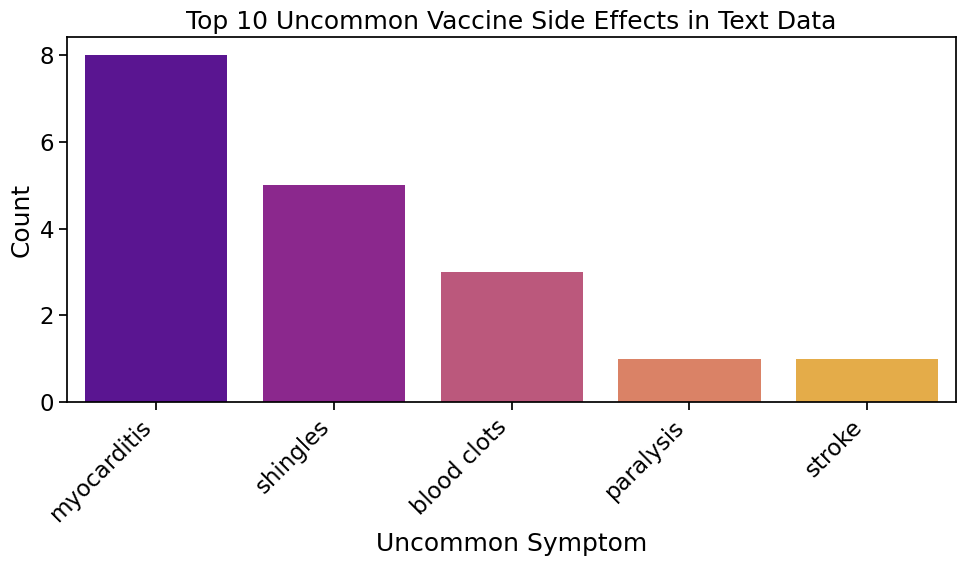

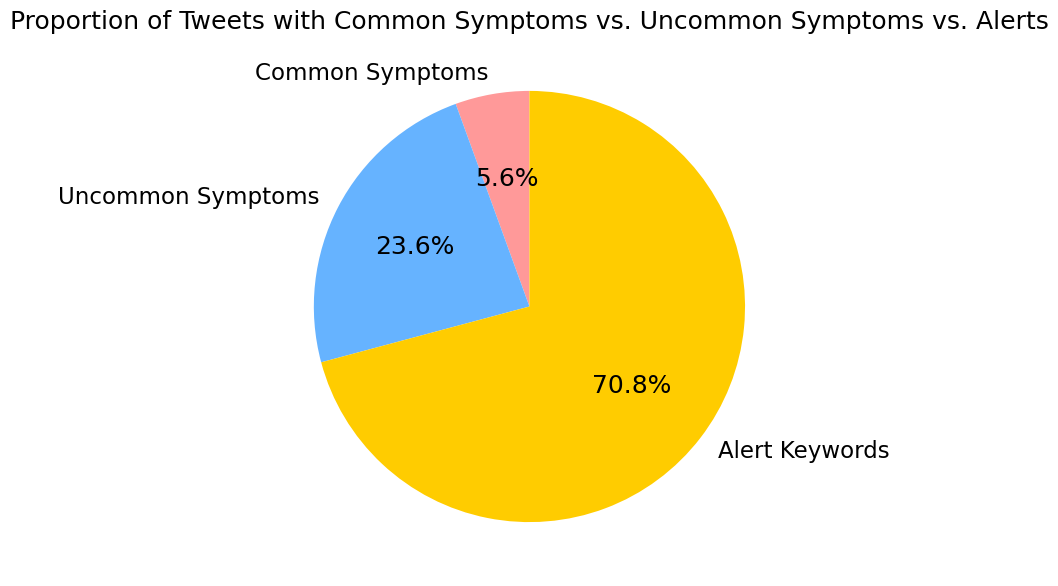

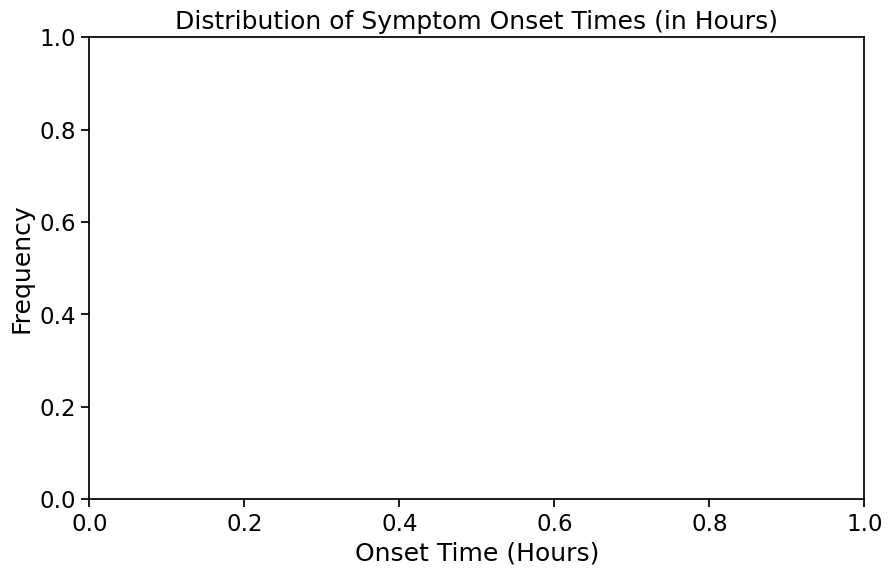


Example Text0 for Onset Time Plot:
Guy doesn t understand that the vaccine would have been effective if ppl had worn their masks and no variants had developed


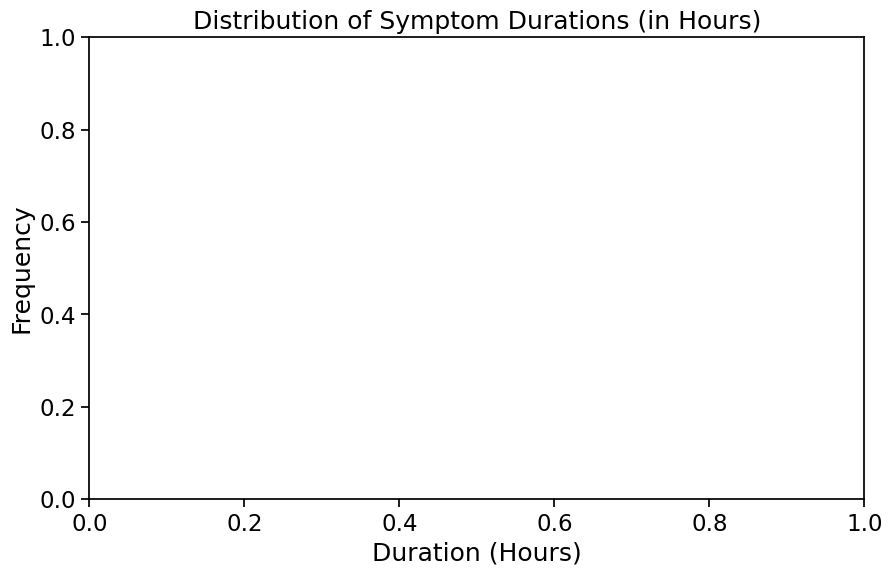


Example Text0 for Symptom Duration Plot:
linda You re required to vaccinate your children before going to school and some states prohibit anything other than a medical exemption You have to provide proof of vaccination against certain diseases before traveling abroad Vaccine mandates are not new and are constitutional


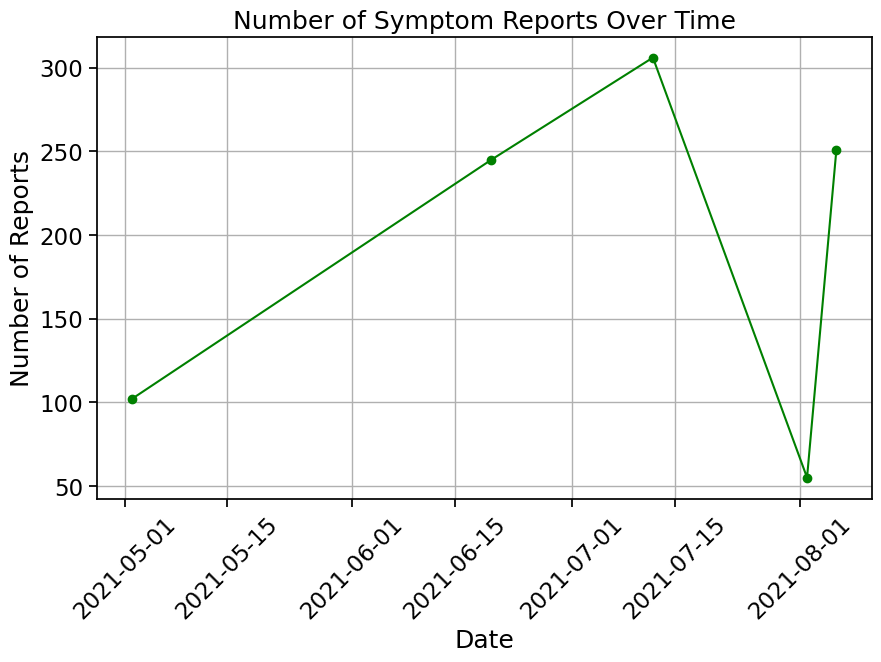


Example Text0 for Symptom Reports Over Time Plot:
s Without an economy there is nothing The virus is worldwide it was always here to stay zero covid is redundant as a concept We have over 80 immunity as population through vaccine natural immunity there is nothing more now as a population we can do


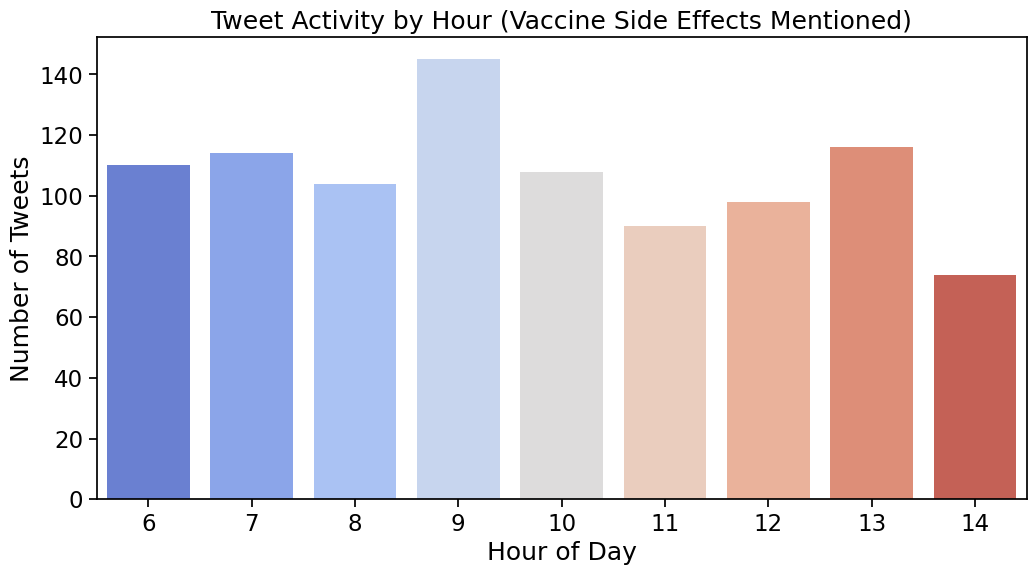

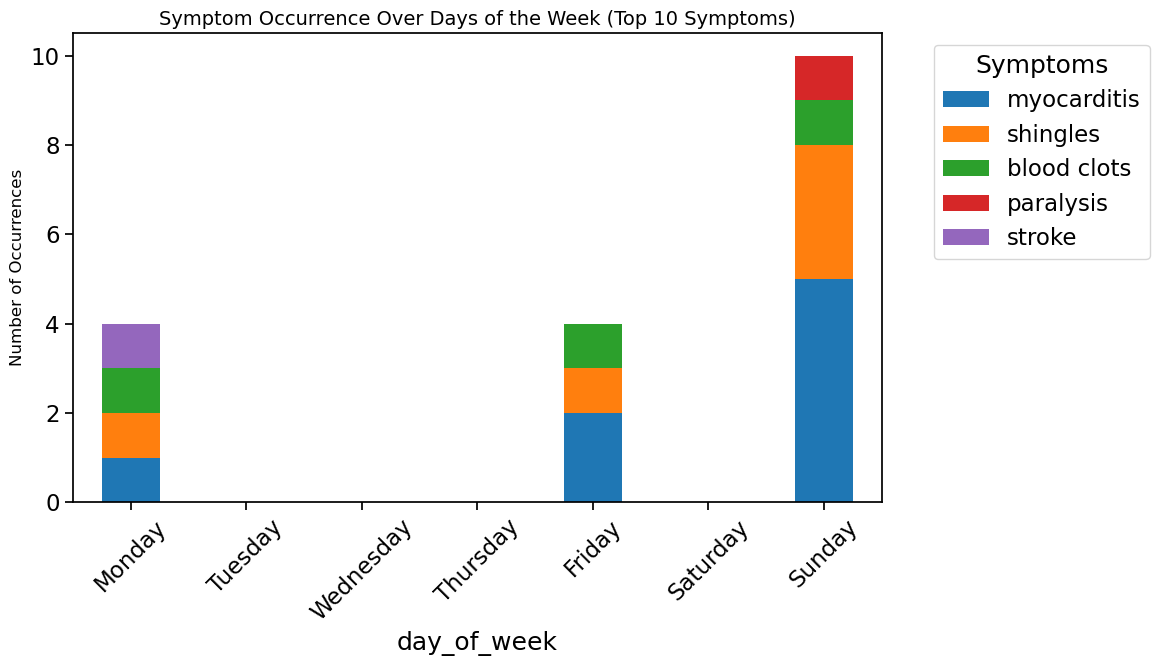

Proportions of Top 10 Symptoms by Day of the Week:
extracted_symptoms  myocarditis  shingles  blood clots  paralysis  stroke
day_of_week                                                              
Monday                     0.25      0.25         0.25        0.0    0.25
Tuesday                     NaN       NaN          NaN        NaN     NaN
Wednesday                   NaN       NaN          NaN        NaN     NaN
Thursday                    NaN       NaN          NaN        NaN     NaN
Friday                     0.50      0.25         0.25        0.0    0.00
Saturday                    NaN       NaN          NaN        NaN     NaN
Sunday                     0.50      0.30         0.10        0.1    0.00


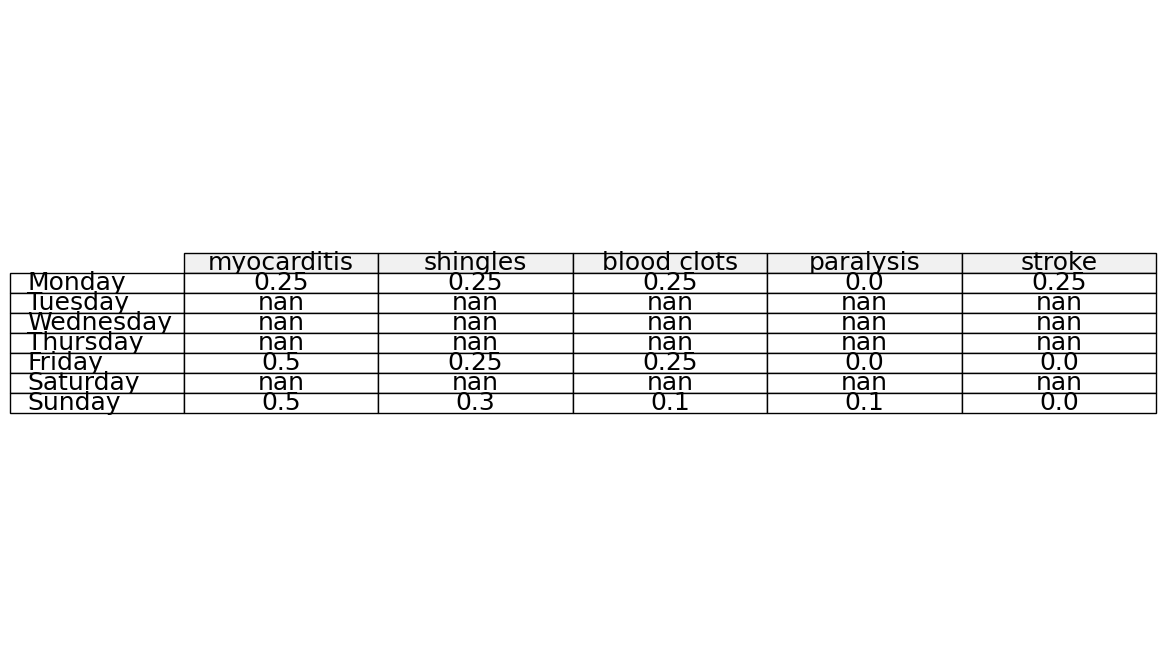

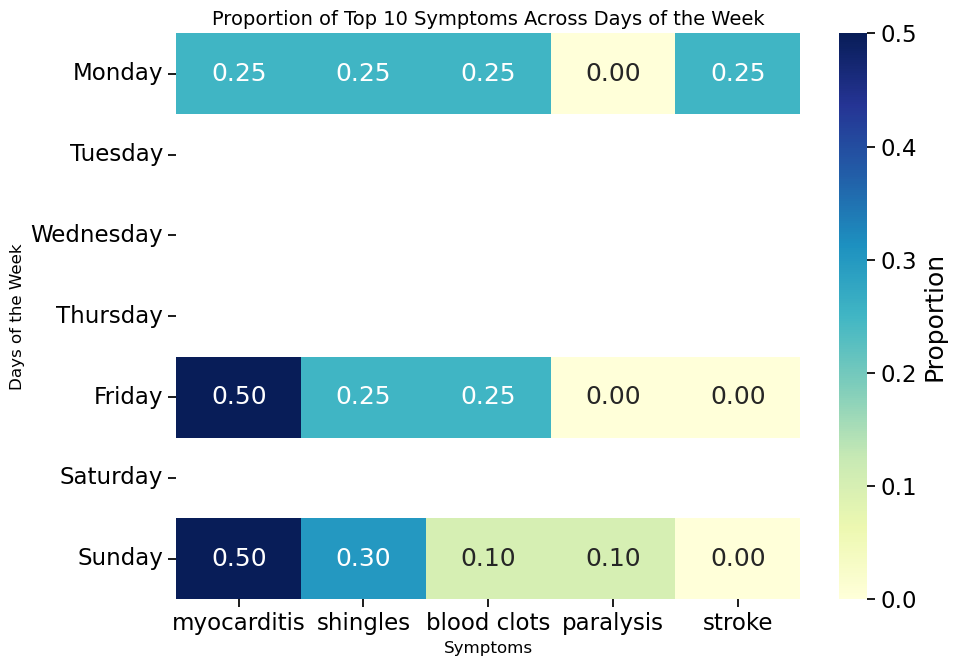

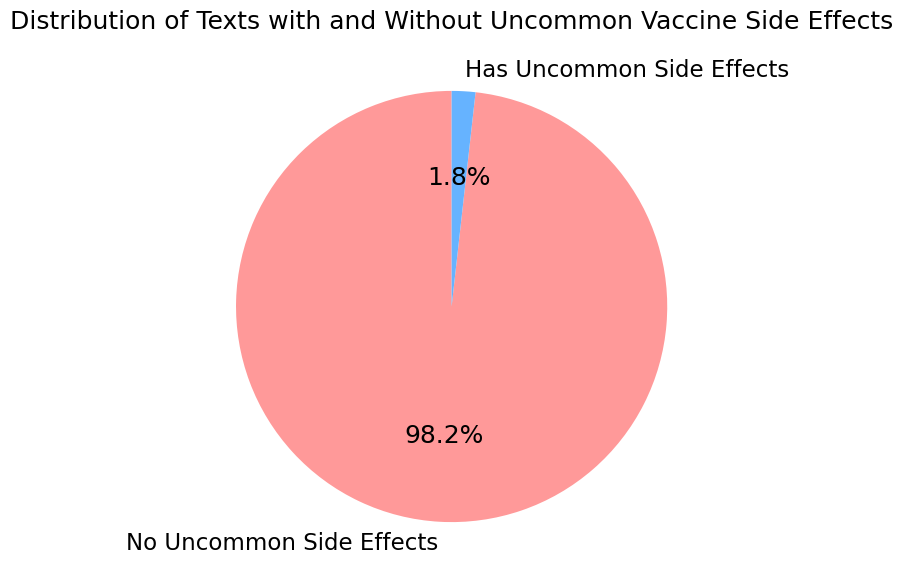

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91990\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


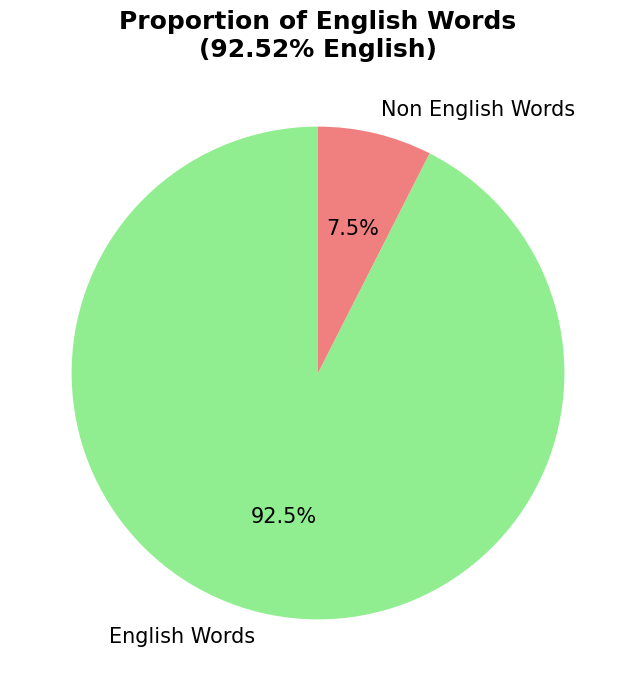

Proportion of English words: 92.52%


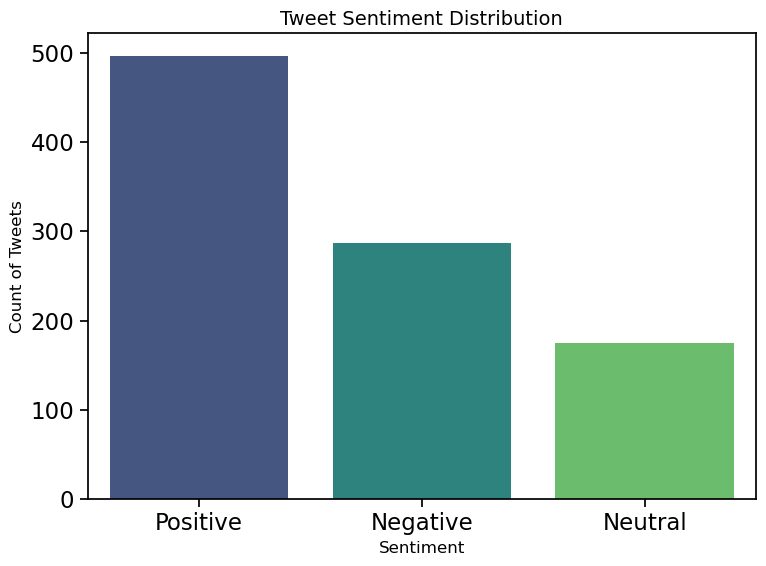

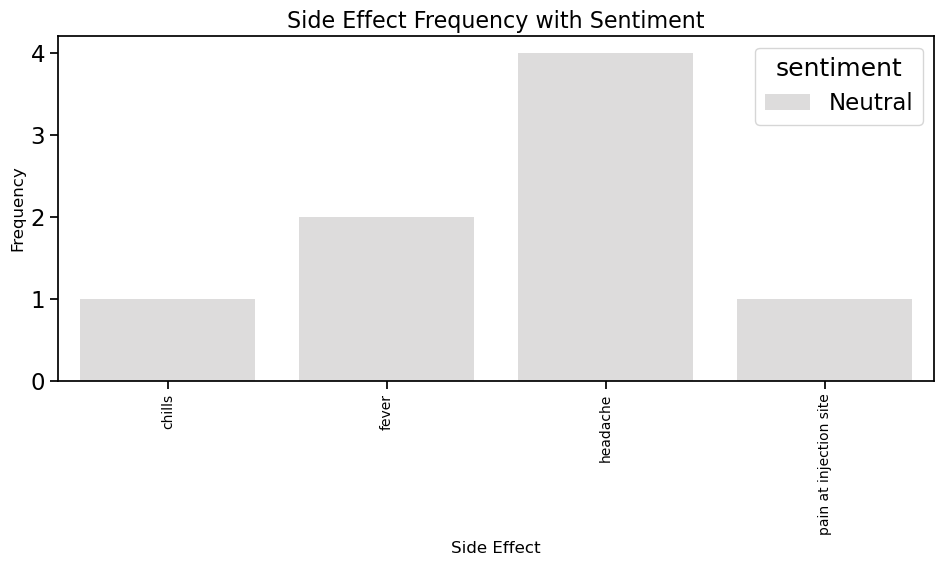

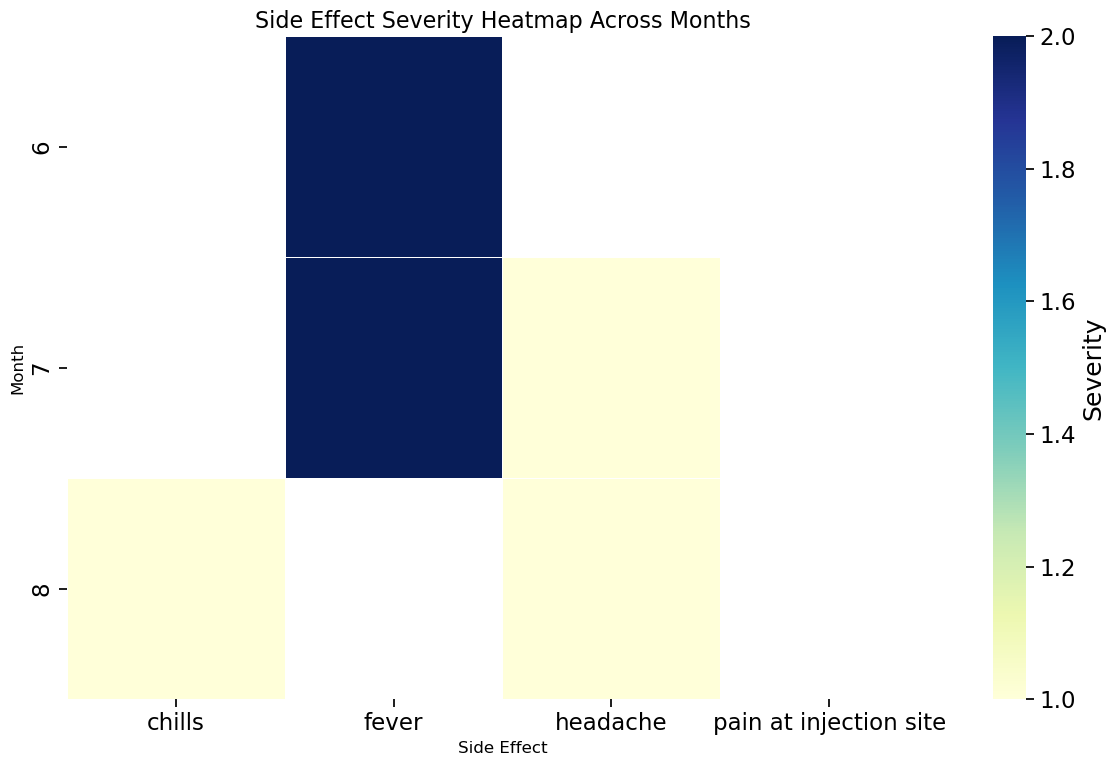

C:\Users\91990\AppData\Local\Temp\ipykernel_16948\1448501446.py:1091: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=slang_sentiment_counts, x='x_label', y='count', hue='sentiment', palette='Set2', ci=None)


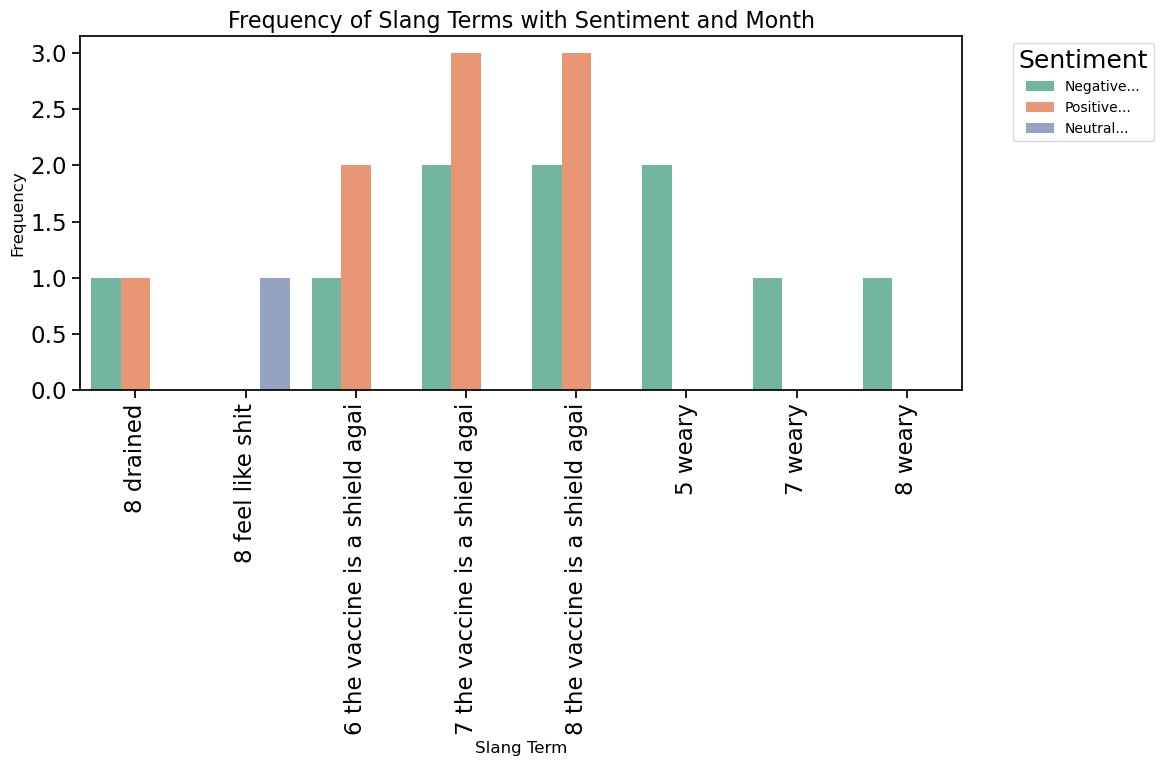

C:\Users\91990\AppData\Local\Temp\ipykernel_16948\1448501446.py:1102: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=time_sentiment_counts, x='x_label', y='count', hue='sentiment', palette='Set2', ci=None)


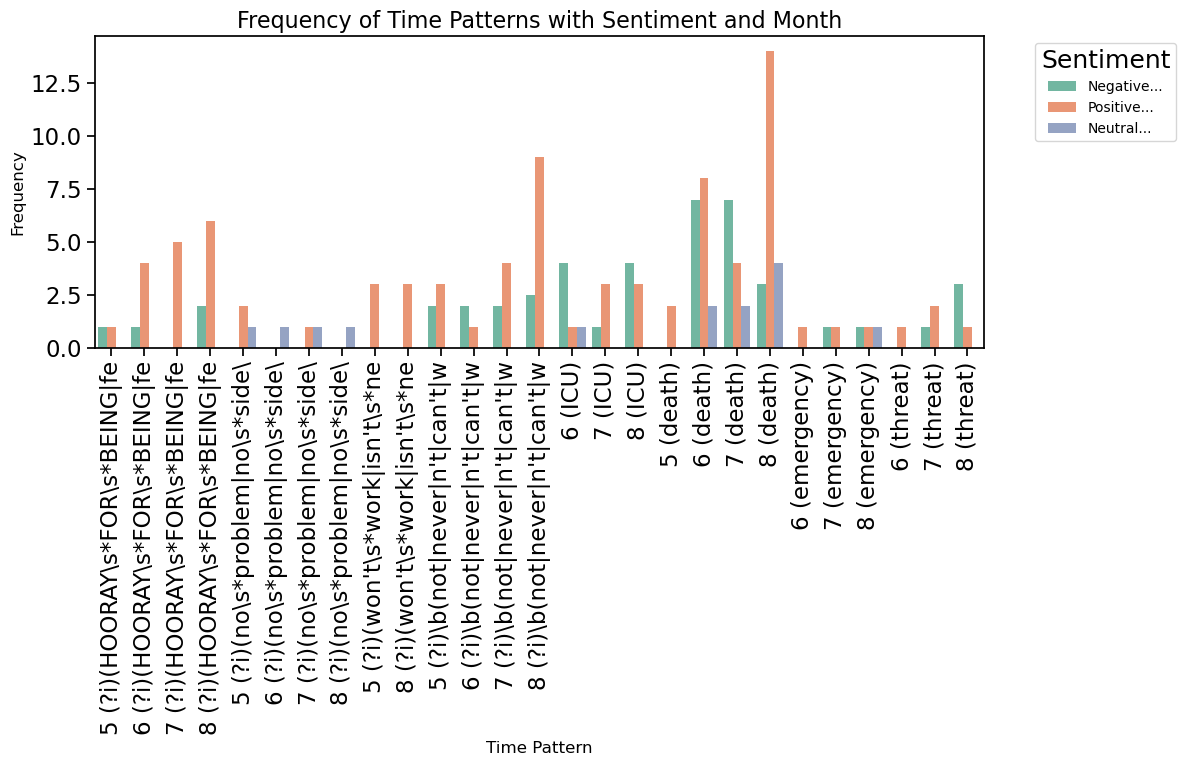

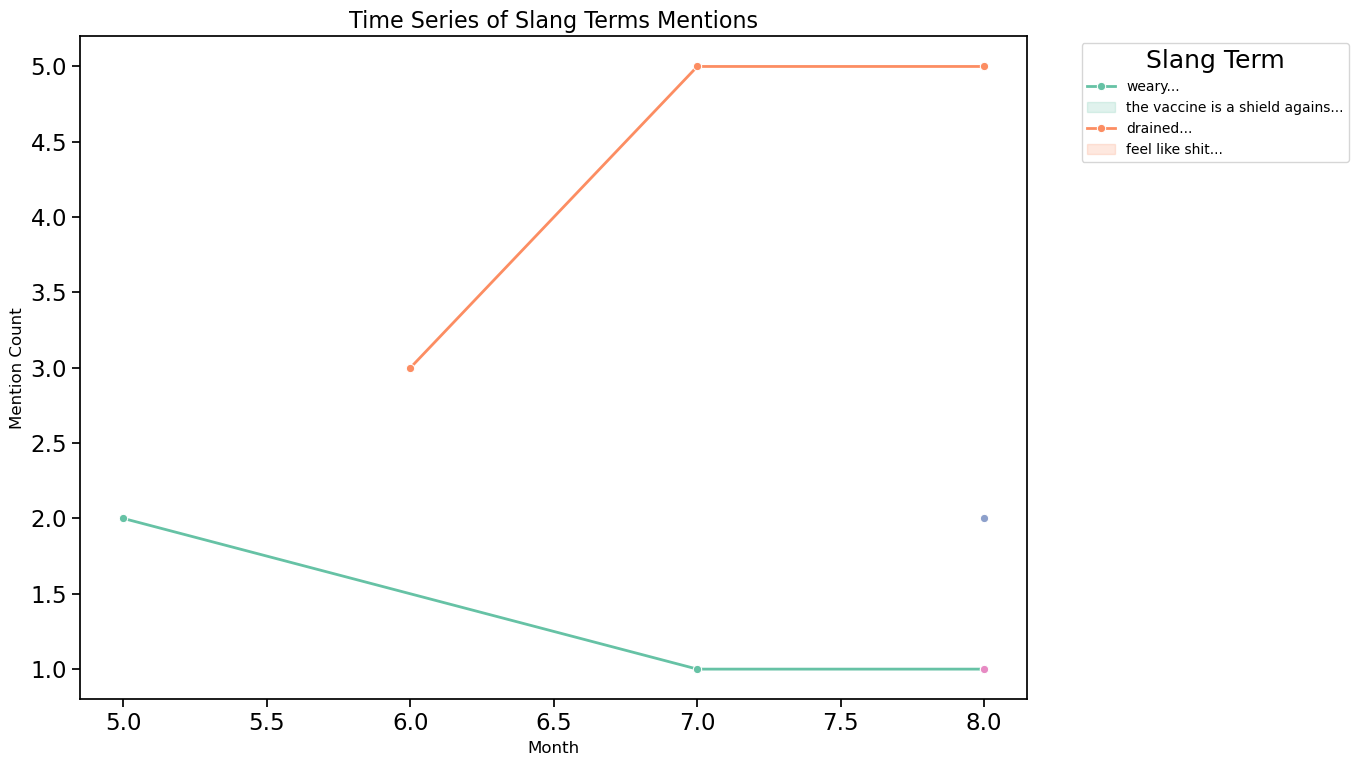

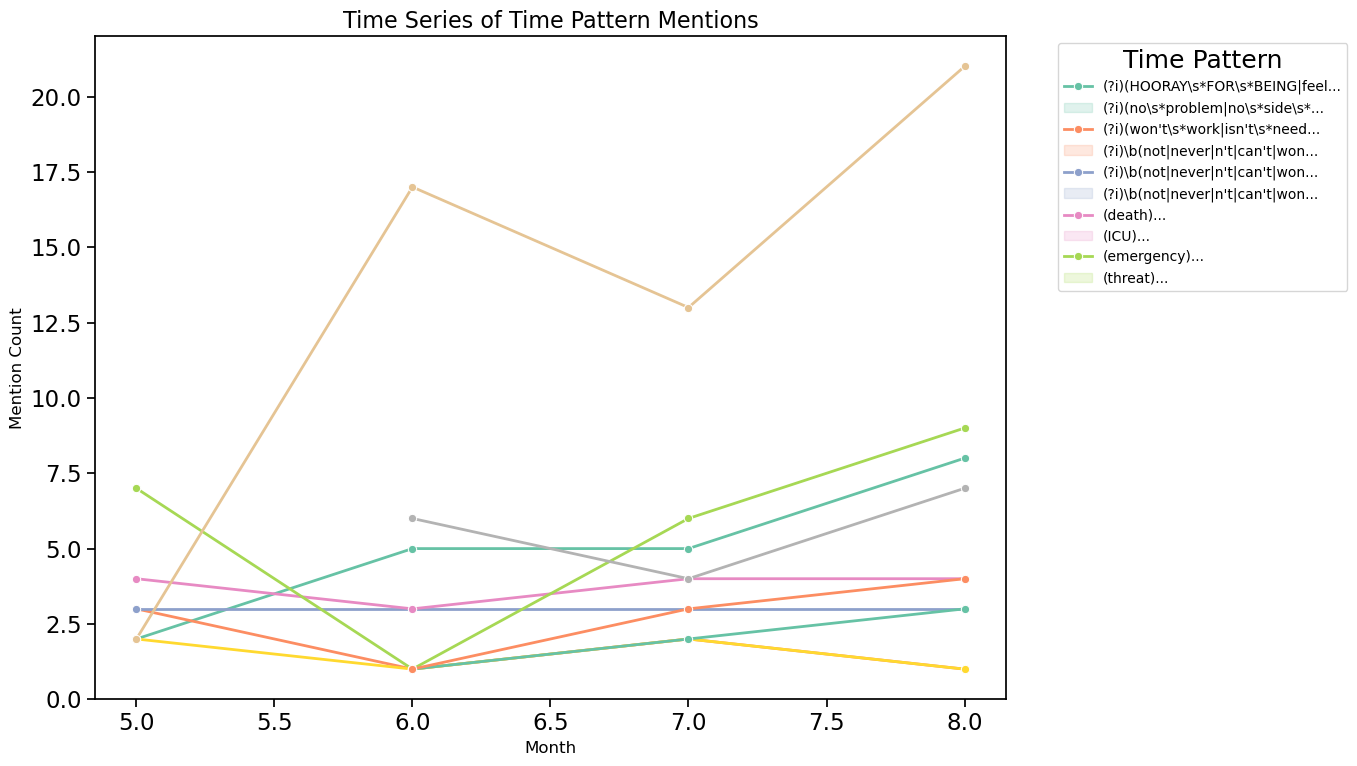

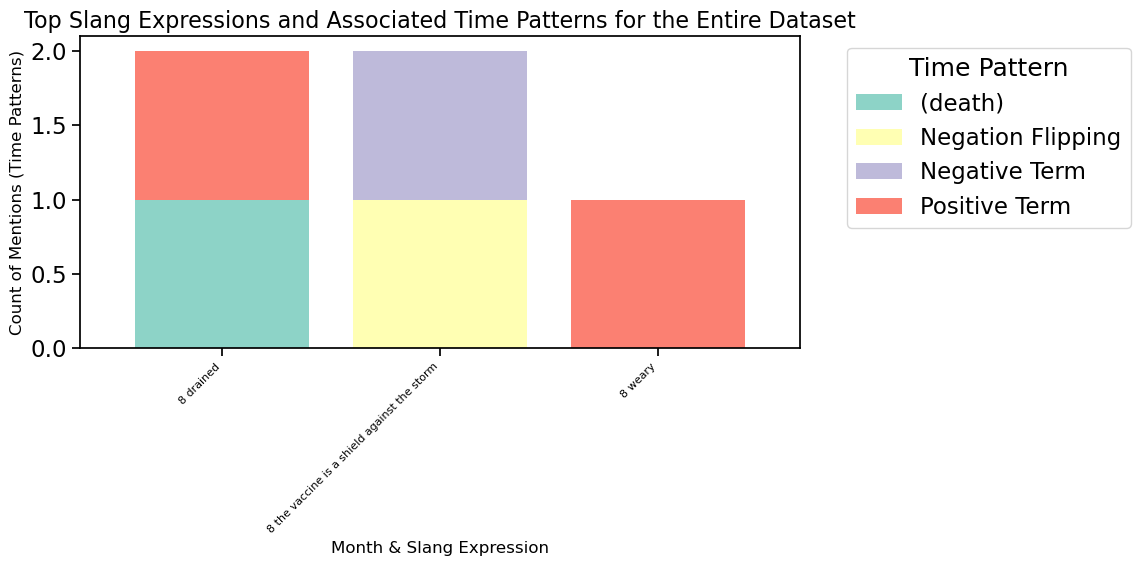

C:\Users\91990\AppData\Local\Temp\ipykernel_16948\1448501446.py:1184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[['slang_matches', 'time_pattern_matches']] = dataframe['Text0'].apply(lambda x: pd.Series(categorize_slang_and_time_patterns(x)))


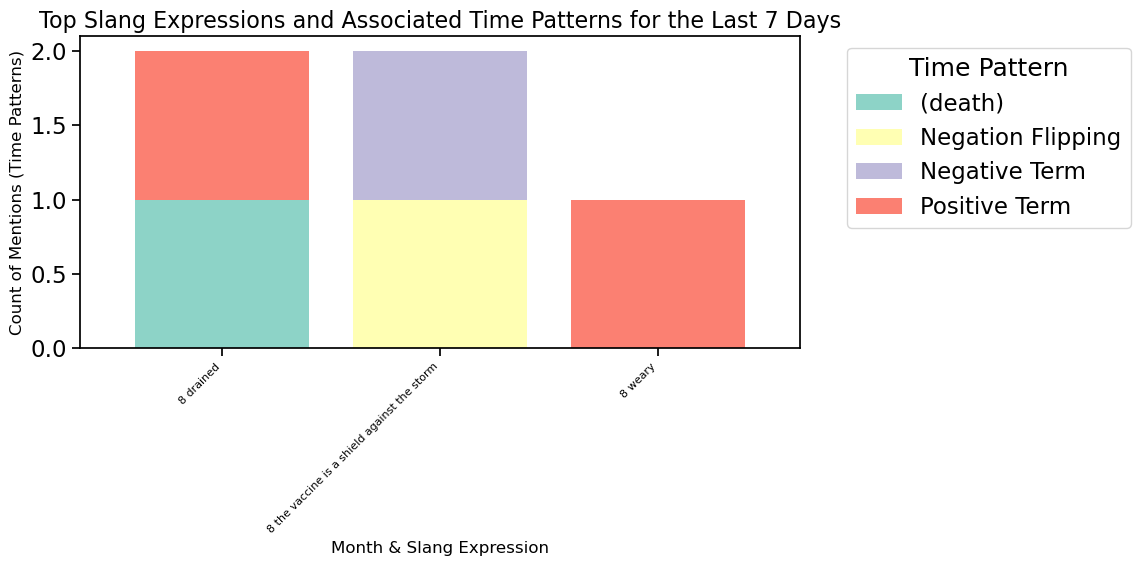

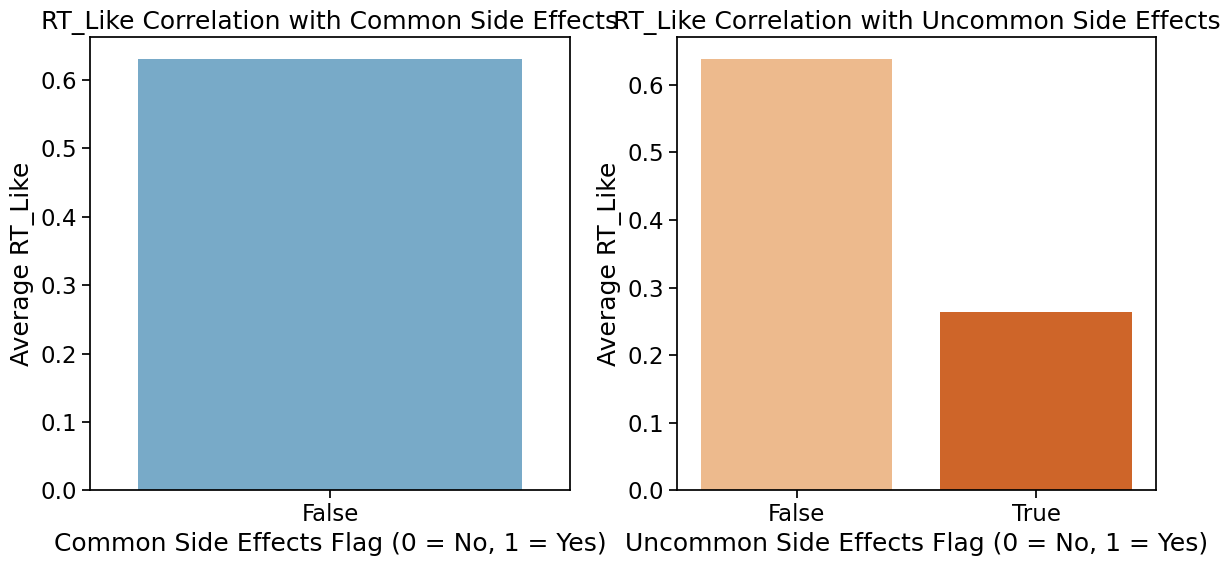

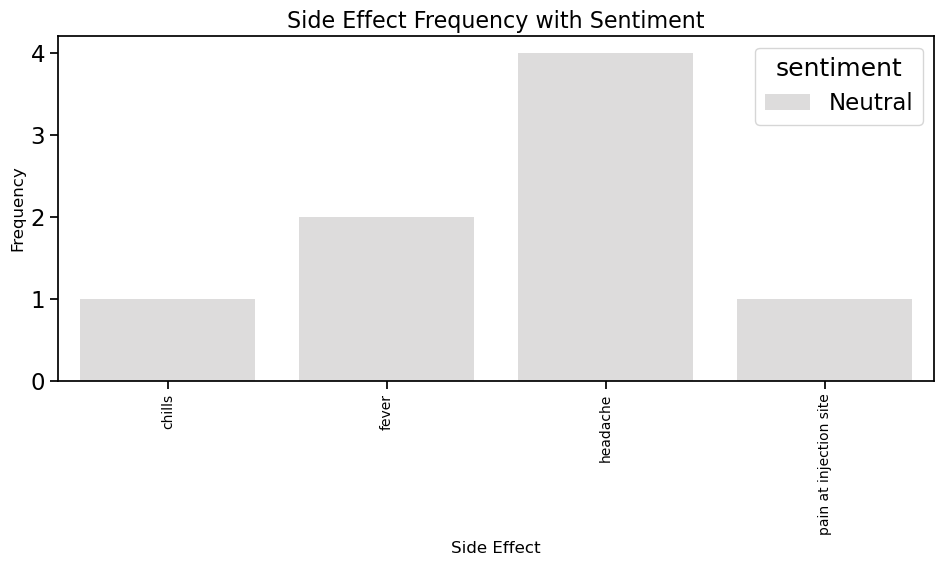

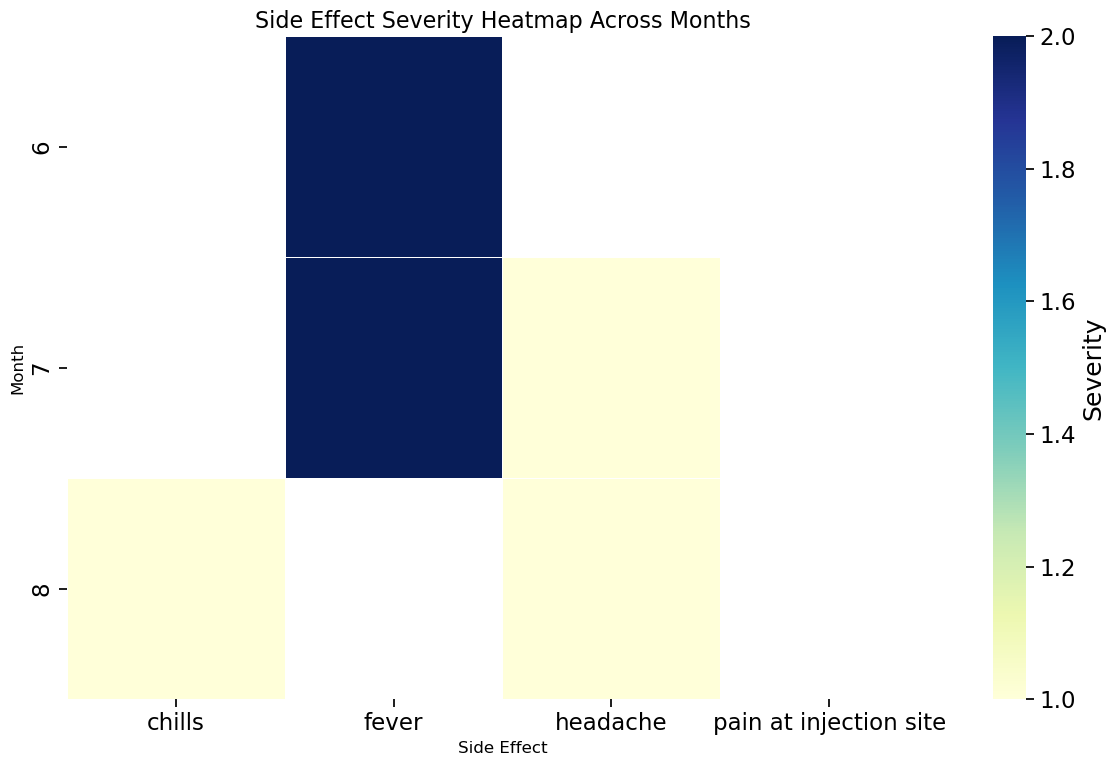

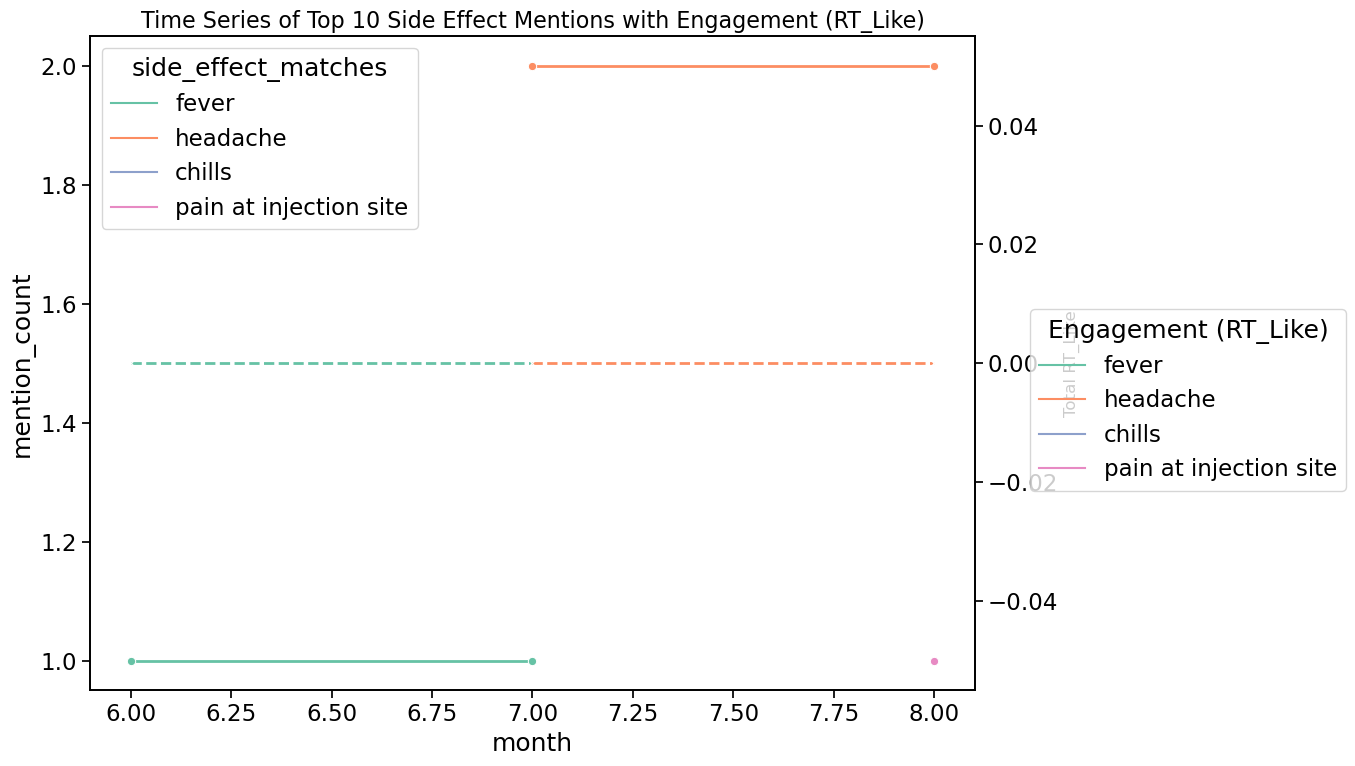

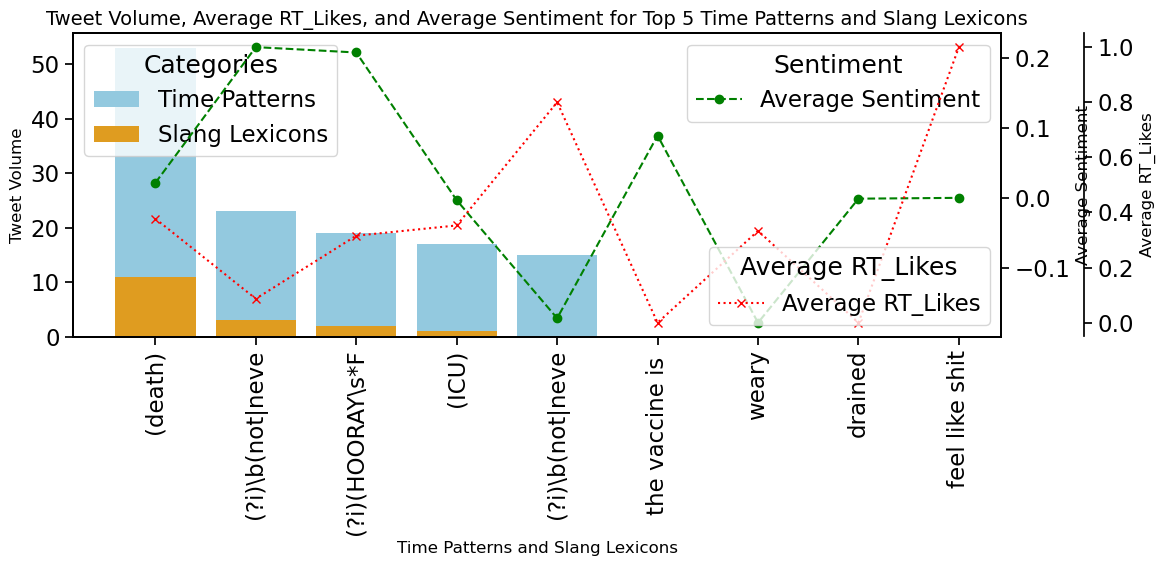

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and the 'Date' column is in 'YYYY-MM-DD' format

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week from the 'Date' column (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Date'].dt.day_name()

# Count the occurrences of each day of the week
day_of_week_counts = df['DayOfWeek'].value_counts()

# Define the correct order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to ensure all days of the week are included, even if some days are missing
day_of_week_counts = day_of_week_counts.reindex(weekday_order, fill_value=0)


# **Step: Plot the results as a bar plot**
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
day_of_week_counts.plot(kind='bar', color='skyblue', edgecolor='black')  # Create bar plot
plt.title('Occurrences of Each Day of the Week')  # Add a title
plt.xlabel('Day of the Week')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot




















import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Example DataFrame (df) with a 'Text0' column containing tweets
# df = pd.read_csv('your_file.csv')  # Un-comment to read from a file

# Words and phrases to search for in the tweets
keywords = [
    'covid',
    'feeling',
    'vaccine',
    'covid vaccine',
    'side effect',
    'adverse effect',
    'adverse event',
    'covid vaccine side effect',
    'covid vaccine adverse effect',
    'covid vaccine adverse event',
]

# Add a check for words starting with #
keywords.append(r'\#\w+')

# Create a boolean DataFrame with True/False values for each keyword
keyword_counts = {keyword: df['Text0'].str.contains(keyword, case=False, na=False) for keyword in keywords}

# Add a column for tweets that do not contain any of the keywords
keyword_counts['none_of_these'] = ~df['Text0'].str.contains('|'.join(keywords), case=False, na=False)

# Convert the boolean values into integers (True = 1, False = 0)
keyword_counts = pd.DataFrame(keyword_counts).astype(int)

# Calculate the count of tweets containing each keyword or group of keywords
keyword_sums = keyword_counts.sum()

# Filter out any keywords with a count of zero
keyword_sums = keyword_sums[keyword_sums > 0]

# Sort the keyword sums in descending order
keyword_sums = keyword_sums.sort_values(ascending=False)

# Set the display option to avoid scientific notation in y-axis
plt.figure(figsize=(8, 5))  # Adjust the figure size to make it compact
ax = keyword_sums.plot(kind='bar', stacked=True)

# Customize the y-axis to avoid scientific notation
ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))

# Add labels and title
plt.title('Count of Tweets Containing Specific Keywords or Phrases')
plt.xlabel('Categories')
plt.ylabel('Count of Tweets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to fit better
plt.tight_layout()  # Adjust layout to remove unnecessary whitespace

# Show the plot
plt.show()

# Now count the total number of words starting with #
# Use regex to find all words starting with #
hashtag_words = df['Text0'].str.findall(r'\#\w+')

# Flatten the list of lists and count the total number of words
total_hashtag_words = sum(len(words) for words in hashtag_words)

# Print the total count of words starting with #
print(f"Total count of words starting with # in the entire 'Text0' column: {total_hashtag_words}")











import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Assuming you have the DataFrame 'df' with necessary columns

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df['month'] = df['Date'].dt.month  # Extract month if not already present

# Sort data by Date to apply rolling average correctly
df = df.sort_values(by='Date')

# Set larger font sizes globally for the plots
sns.set_context("notebook", font_scale=1.5)  # Increase the font size of labels and titles

# Ensure all months are represented in the data (even those without records)
all_months = pd.Series(range(1, 13))
monthly_data = df.groupby('month').size().reset_index(name='count')
monthly_data = all_months.to_frame(name='month').merge(monthly_data, on='month', how='left')

# Plot 1: Count of data (number of rows) per month
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_data['month'], y=monthly_data['count'], palette='Blues')
plt.title("Count of Data per Month", fontsize=18)
plt.xlabel("Month", fontsize=19)
plt.ylabel("Count of Data", fontsize=19)
plt.xticks(rotation=45, fontsize=19)
plt.yticks(fontsize=14)
plt.show()












# **Step 3: Sentiment Analysis**
# In this step, we perform sentiment analysis on the cleaned tweet text to classify the sentiment
# as either "positive", "negative", or "neutral". We use the TextBlob library to analyze the text
# and determine the sentiment polarity, which is a value ranging from -1 (very negative) to 1 (very positive).
# Sentiment is assigned based on the polarity:
#   - Positive sentiment is assigned if polarity is greater than 0
#   - Negative sentiment is assigned if polarity is less than 0
#   - Neutral sentiment is assigned if polarity equals 0 (neutral)
#
# The `get_sentiment()` function ensures that the input text is a string, performs sentiment analysis using TextBlob,
# and categorizes the sentiment based on the polarity score. The function is applied to each tweet in the 'cleaned_text'
# column, and the resulting sentiment labels (positive, negative, neutral) are stored in a new column called 'sentiment'.

from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get sentiment (positive, neutral, negative) from text
def get_sentiment(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = ""  # Replace non-string with empty string or some default text

    # Perform sentiment analysis
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Sentiment polarity: ranges from -1 (negative) to 1 (positive)

    # Assign sentiment categories based on polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each tweet in 'Text0' column
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Check sentiment distribution
print(df['sentiment'].value_counts())  # To see if there are actually any neutral, positive, negative sentiments

# Check sample text and sentiment results to ensure correctness
print(df[['cleaned_text', 'sentiment']].head())  # Preview the first few rows

# Plot sentiment distribution as a histogram
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot to show the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values.astype(int), palette='Set2')

# Customize plot labels and title
plt.title('Sentiment Distribution of Tweets', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()








import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assuming df is your DataFrame and 'known_symptoms', 'uncommon_vaccine_side_effects_lexicon', and 'alert_keywords' are predefined

# Function to extract symptoms based on a lexicon (common or uncommon side effects)
def extract_symptoms(text, lexicon=known_symptoms):
    if not isinstance(text, str):  # Ensure text is a string
        return []

    extracted = []
    # Check for known symptoms in the lexicon
    for symptom in lexicon:
        if re.search(r'\b' + re.escape(symptom) + r'\b', text.lower()):
            extracted.append(symptom)

    return extracted

# Function to extract alert keywords based on the alert lexicon
def extract_alert_keywords(text, lexicon=alert_keywords):
    if not isinstance(text, str):  # Ensure text is a string
        return []

    extracted = []
    # Check for alert keywords in the lexicon
    for alert in lexicon:
        if re.search(r'\b' + re.escape(alert) + r'\b', text.lower()):
            extracted.append(alert)

    return extracted

# Apply symptom extraction to each tweet (assuming 'Text0' is the tweet text)
df['extracted_symptoms'] = df['Text0'].apply(lambda x: extract_symptoms(x))

# Create a flag indicating whether any known symptoms were mentioned in the tweet
df['known_symptoms_flag'] = df['extracted_symptoms'].apply(lambda x: 1 if x else 0)

# Create a flag indicating whether any uncommon symptoms were mentioned in the tweet
def extract_uncommon_symptoms(text, lexicon=uncommon_vaccine_side_effects_lexicon):
    if not isinstance(text, str):  # Ensure text is a string
        return []

    extracted = []
    # Check for uncommon symptoms in the lexicon
    for symptom in lexicon:
        if re.search(r'\b' + re.escape(symptom) + r'\b', text.lower()):
            extracted.append(symptom)

    return extracted

# Apply uncommon symptom extraction to each tweet (assuming 'Text0' is the tweet text)
df['extracted_uncommon_symptoms'] = df['Text0'].apply(lambda x: extract_uncommon_symptoms(x))

# Create a flag indicating whether any uncommon symptoms were mentioned in the tweet
df['uncommon_symptoms_flag'] = df['extracted_uncommon_symptoms'].apply(lambda x: 1 if x else 0)

# Apply alert keyword extraction to each tweet
df['extracted_alert_keywords'] = df['Text0'].apply(lambda x: extract_alert_keywords(x))

# Create a flag indicating whether any alert keywords were mentioned in the tweet
df['alert_keywords_flag'] = df['extracted_alert_keywords'].apply(lambda x: 1 if x else 0)

# Save the results to a CSV file without overwriting the original data
#df[['extracted_symptoms', 'extracted_uncommon_symptoms', 'extracted_alert_keywords', 'known_symptoms_flag', 'uncommon_symptoms_flag', 'alert_keywords_flag']].to_csv(
#    'sideeffects_100.csv', index=False)

# Visualization 1: Count of each known symptom detected in the dataset
all_known_symptoms = [symptom for sublist in df['extracted_symptoms'] for symptom in sublist]

# Plot bar chart of the top 10 symptom frequencies
plt.figure(figsize=(10, 6))
symptom_counts = pd.Series(all_known_symptoms).value_counts()
# Get the top 10 most frequent symptoms
top_10_symptoms = symptom_counts.head(10)
# Plot the bar chart for the top 10 symptoms
sns.barplot(x=top_10_symptoms.index, y=top_10_symptoms.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Known Vaccine Side Effects in Text Data")
plt.xlabel("Symptom")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Visualization 2: Bar chart for uncommon vaccine side effects (using 'uncommon_vaccine_side_effects_lexicon')
all_uncommon_symptoms = [symptom for sublist in df['extracted_uncommon_symptoms'] for symptom in sublist]

# Plot bar chart of the top 10 uncommon symptom frequencies
plt.figure(figsize=(10, 6))
uncommon_symptom_counts = pd.Series(all_uncommon_symptoms).value_counts()
# Get the top 10 most frequent uncommon symptoms
top_10_uncommon_symptoms = uncommon_symptom_counts.head(10)
# Plot the bar chart for the top 10 uncommon symptoms
sns.barplot(x=top_10_uncommon_symptoms.index, y=top_10_uncommon_symptoms.values, palette="plasma")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Uncommon Vaccine Side Effects in Text Data")
plt.xlabel("Uncommon Symptom")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Visualization 3: Pie chart for distribution of texts with Common Symptoms, Uncommon Symptoms, and Alerts
common_symptoms_count = (df['known_symptoms_flag'] == 1).sum()
uncommon_symptoms_count = (df['uncommon_symptoms_flag'] == 1).sum()
alert_keywords_count = (df['alert_keywords_flag'] == 1).sum()

# Create labels for common, uncommon, and alert keywords
labels = ["Common Symptoms", "Uncommon Symptoms", "Alert Keywords"]

# Plot the pie chart for tweets with common, uncommon symptoms, and alert keywords
plt.figure(figsize=(7, 7))
plt.pie([common_symptoms_count, uncommon_symptoms_count, alert_keywords_count], labels=labels,
        autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff", "#ffcc00"])
plt.title("Proportion of Tweets with Common Symptoms vs. Uncommon Symptoms vs. Alerts")
plt.show()










import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from textblob import TextBlob

# Assuming your DataFrame df is already loaded with the necessary data and columns

# Function to extract timestamp mentions and track onset (from the Text0 column)
def extract_onset_time(text):
    if not isinstance(text, str):  # Ensure text is a string
        return []  # Return empty list for non-string values (including NaN/None)

    # Define replacement for non-numeric time values (e.g., "a", "few", "couple")
    replacements = {
        "a": 1,           # "a" becomes 1 hour
        "few": 2,         # "few" becomes 2 hours
        "couple": 2,      # "couple" becomes 2 hours
        "several": 3,     # "several" becomes 3 hours
        "many": 5,        # "many" becomes 5 hours
        "dozen": 12,      # "dozen" becomes 12 hours
        "half": 0.5,      # "half" becomes 0.5 hours
        "long": 8,        # "long" becomes 8 hours
        "short": 1,       # "short" becomes 1 hour
        "some": 3,        # "some" becomes 3 hours
        "next": 24,       # "next" becomes 24 hours (1 day)
        "last": 24,       # "last" becomes 24 hours (1 day)
        "immediate": 0,   # "immediate" becomes 0 hours (instantaneous)
        "soon": 1,        # "soon" becomes 1 hour
        "this": 1,        # "this" becomes 1 hour
        "after": 1,       # "after" becomes 1 hour
        "before": 1,      # "before" becomes 1 hour
        "morning": 6,     # "morning" becomes 6 hours
        "afternoon": 6,   # "afternoon" becomes 6 hours
        "evening": 6,     # "evening" becomes 6 hours
        "night": 8,       # "night" becomes 8 hours
        "week": 168,      # "week" becomes 168 hours (7 days)
        "month": 730,     # "month" becomes 730 hours (30 days)
    }


    time_patterns = [
    # Patterns for Sentiment Analysis related to Vaccines
    r"(not\s*get\s*vaccine)",
    r"(not\s*believe\s*in\s*vaccine)",
    r"(vaccine\s*(has\s*no\s*side\s*effects|was\s*effective))",
    r"(vaccine\s*(should\s*be\s*mandatory|should\s*be\s*choice))",
    r"(i\s*(am\s*scared|am\s*hesitant)\s*about\s*vaccine)",
    r"(vaccine\s*does\s*not\s*prevent\s*covid)",
    r"(vaccine\s*gave\s*me\s*side\s*effects)",
    r"(vaccine\s*is\s*a\s*choice\s*not\s*a\s*mandate)",
    r"(vaccine\s*(is\s*helping|has\s*been\s*effective))",
    r"(vaccine\s*has\s*caused\s*issues|vaccine\s*causes\s*harm)",
    r"(vaccine\s*is\s*safe|vaccine\s*has\s*worked\s*for\s*me)",
    r"(vaccine\s*(does\s*not\s*work|does\s*not\s*prevent\s*covid))",
    r"(not\s*going\s*to\s*take\s*vaccine)",
    r"(vaccine\s*has\s*side\s*effects\s*(but\s*still\s*taking\s*it|had\s*no\s*problem))",
    r"(do\s*not\s*want\s*the\s*vaccine)",
    r"(vaccinated\s*and\s*still\s*get\s*covid)",
    r"(side\s*effects\s*from\s*vaccine)",
    r"(i\s*feel\s*confident\s*after\s*vaccine)",
    r"(it\s*worked\s*for\s*me\s*but\s*not\s*for\s*everyone)",
    r"(still\s*believe\s*vaccine\s*works)",
    r"(hesitant\s*about\s*vaccine\s*but\s*getting\s*it)",
    r"(vaccine\s*should\s*be\s*voluntary)",
    r"(vaccine\s*does\s*not\s*prevent\s*certain\s*strains)",
    r"(there\s*are\s*issues\s*with\s*vaccine)",
    r"(vaccine\s*is\s*a\s*choice\s*for\s*individuals)",

    # Mandate and Forced Vaccine (Mandate is forced and unwanted)
    r"((vaccine\s*mandates\s*(are|should\s*be)\s*(necessary|unnecessary|unconstitutional|forced|wrong)|vaccine\s*passport\s*(is|should\s*be)\s*(illegal|unethical|infringing|wrong)))",

    # Negation of Vaccine Mandates
    r"(\b(not\s*enough\s*vaccine\s*availability|vaccine\s*mandates\s*should\s*not\s*be\s*forced|vaccine\s*mandates\s*should\s*be\s*optional))",

    # Personal choice & free will sentiment
    r"((vaccine\s*is\s*personal\s*choice|vaccine\s*(should\s*not\s*be)\s*forced|vaccine\s*is\s*optional))",

    # Positive (Belief in Science/Trust in Vaccine)
    r"(vaccine\s*is\s*backed\s*by\s*science|vaccine\s*reduces\s*infection\s*risk|vaccine\s*(protects|saves)\s*lives|vaccine\s*is\s*scientifically\s*proven)",

    # Negative (Skepticism about Science/Belief)
    r"(vaccine\s*is\s*unproven|vaccine\s*is\s*unsafe|vaccine\s*is\s*experimental|vaccine\s*is\s*just\s*political)",

    # Sentiment where "not" negates positive claims (e.g., negating vaccine benefits)
    r"(\bnot\s*effective\s*against\s*covid|vaccine\s*does\s*not\s*prevent\s*covid|vaccine\s*does\s*not\s*reduce\s*spread)",

    # Mixed Sentiment (Vaccination + Side effects)
    r"(vaccine\s*has\s*side\s*effects\s*(but\s*is\s*still\s*necessary|and\s*is\s*worth\s*the\s*risks|and\s*is\s*minor\s*compared\s*to\s*disease))",

    # Sentiment in Relation to Specific Groups (vaccine is important for some people, not for others)
    r"(vaccine\s*is\s*important\s*for\s*(health\s*care\s*workers|elderly|those\s*with\s*pre-existing\s*conditions|high\s*risk\s*populations))",

    # Sentiment on Covid & Vaccine Benefits
    r"(covid\s*is\s*real\s*and\s*vaccine\s*is\s*important|covid\s*should\s*not\s*be\s*taken\s*lightly|covid\s*can\s*kill\s*and\s*vaccine\s*helps)",
    r"(covid\s*is\s*serious|covid\s*can\s*be\sdangerous|covid\s*has\s*changed\s*the\s*world|covid\s*is\s*a\s*threat)",

    # Patterns related to concerns and skepticism but open to vaccination
    r"(concerned\s*about\s*vaccine\s*but\s*still\s*getting\s*it)",
    r"(vaccine\s*has\s*risks\s*but\s*is\s*necessary)",
    r"(unsure\s*about\s*vaccine\s*but\s*still\s*considering\s*it)",

    # Positive Sentiment with no negation
    r"(?i)(HOORAY\s*FOR\s*BEING|feel\s*good|feel\s*great|thanks\s*for\s*the\s*compliment|good\s*day|thank\s*you|love|works\s*for\s*me|exited|built\s*different|feel\s*like\s*doing|positive\s*effect)",

    # Negative Sentiment Patterns
    r"(?i)(won't\s*work|isn't\s*needed|don't\s*think|can't\s*believe|never\s*going\s*back|no\s*way\s*to\s*prove|does\s*not\s*work|not\s*safe|bad\s*side\s*effects|problem\s*with\s*vaccine|not\s*effective|failure\s*of)",

    # Patterns for negation affecting sentiment
    r"(?i)(not\s*work|not\s*happy|not\s*good|can't\s*be|never\s*needed|don't\s*agree|can't\s*accept|didn't\s*feel|won't\s*agree|don't\s*like|not\s*comfortable)",
    r"(?i)(no\s*problem|no\s*side\s*effects|no\s*issues|won't\s*affect|not\s*concerned|didn't\s*mind|don't\s*care|not\s*worried)",

    # Detect negation flipping positive sentiment
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(positive|great|safe|effective|good|happy)\b",
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(works|help|successful)\b",

    # Detect negation flipping negative sentiment
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(bad|problem|failure|wrong|negative)\b",
    r"(?i)\b(not|never|n't|can't|won't)\b.*\b(worst|issue|failed|sucks|hate)\b",

    # Time patterns (Modified from first lexicon to match the second lexicon style)
    r"(\d+)\s*(hours?|days?)\s*(post-dose|after\s*vaccination|after\s*shot|after\s*injection|post-vaccine|post\s*jab)",
    r"(\d+)\s*(hour|day)\s*(after|since|post|following)",
    r"(\d+)\s*(hrs?|days?)\s*(post-vaccine|after\s*vaccine|post\s*shot)",
    r"(\d+)\s*(hours?|days?)\s*(from\s*injection|from\s*vaccination)",
    r"(\d+)\s*(hr|day)\s*(post\s*administered|after\s*administered)",
    r"(\d+)\s*(hrs?|days?)\s*(following\s*vaccination|following\s*shot)",
    r"(\d+)\s*(hour|day)\s*(after\s*the\s*vaccine|after\s*the\s*shot)",

    # Additional time-related patterns for casual phrasing and specific intervals
    r"(\d+)\s*(hour|day|minute|week)\s*(after\s*the\s*vaccine|post\s*vaccine|after\s*the\s*shot|post\s*shot)",
    r"(a|an)\s*(hour|day|minute|week)\s*(post\s*vaccination|following\s*vaccination)",
    r"(a|few|couple)\s*(hour|day)\s*(after|post|since)\s*(dose|vaccination|shot)",
    r"(\d+)\s*(hours?|days?|weeks?)\s*(since|after|from)\s*(dose|vaccination|shot)",
    r"(\d+)\s*(hrs?|days?|weeks?)\s*(since\s*the\s*injection|since\s*the\s*vaccine)",
    r"within\s*(\d+)\s*(hour|day|week)\s*(post\s*vaccination|post\s*shot)",
    r"(\d+)\s*(minutes?|hrs?|days?|weeks?)\s*(after\s*administered)",
    r"(within|after)\s*(a\s*few|a\s*couple)\s*(hour|day)\s*(post\s*vaccine|post\s*shot)"
]


    onset_times = []
    for pattern in time_patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            # Extract time and convert to numeric
            value = match.group(1).lower()  # Match group as a lowercase string

            # If the value is one of the non-numeric words, replace it
            if value in replacements:
                onset_times.append(replacements[value])
            else:
                try:
                    onset_times.append(int(value))  # Try converting numeric values
                except ValueError:
                    continue  # In case of unexpected non-numeric values

    return onset_times

# Function to analyze symptom duration based on timestamps
def calculate_duration(timestamp, onset_times):
    symptom_duration = []
    for onset in onset_times:
        # Ensure onset is numeric (hours or days)
        if isinstance(onset, int):
            # Calculate the duration based on the onset time (assuming onset is in hours)
            duration = timestamp + pd.Timedelta(hours=onset)
            symptom_duration.append(duration)
    return symptom_duration

# Assuming df is already loaded from the CSV file, apply the processing steps:

# Step 1: Create the timestamp column from the day, month, and year columns (if needed)
df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day']])  # Combine year, month, day
# If 'Date' column already contains the full timestamp, you can replace the above line with:
# df['timestamp'] = pd.to_datetime(df['Date'], errors='coerce')  # Use the 'Date' column directly

# Step 2: Apply the onset extraction function to the 'Text0' column (assumed to contain symptom descriptions)
df['onset_time'] = df['Text0'].apply(extract_onset_time)

# Step 3: Apply duration calculation to determine symptom duration
df['symptom_duration'] = df.apply(lambda row: calculate_duration(row['timestamp'], row['onset_time']), axis=1)

# Step 4: (Optional) Save the processed data to a new CSV file
# output_csv = '/content/drive/My Drive/processed_vaccine_data.csv'  # Path to save the results
# df.to_csv(output_csv, index=False)
# print(f"Processed data saved to {output_csv}")

# Step 5: Plot the results
def plot_results(df):
    # Plot distribution of onset times
    onset_times_flat = [item for sublist in df['onset_time'] for item in sublist]  # Flatten the list of onset times
    plt.figure(figsize=(10, 6))
    sns.histplot(onset_times_flat, kde=True, color='skyblue', bins=10)
    plt.title("Distribution of Symptom Onset Times (in Hours)")
    plt.xlabel("Onset Time (Hours)")
    plt.ylabel("Frequency")
    plt.show()

    # Print example for onset times plot
    example_text_1 = df['Text0'].iloc[0]  # Example of Text0 content for this plot
    print(f"\nExample Text0 for Onset Time Plot:\n{example_text_1}")

    # Plot distribution of symptom durations (in hours)
    symptom_durations_flat = [item for sublist in df['symptom_duration'] for item in sublist]  # Flatten the list of durations
    plt.figure(figsize=(10, 6))
    sns.histplot(symptom_durations_flat, kde=True, color='salmon', bins=10)
    plt.title("Distribution of Symptom Durations (in Hours)")
    plt.xlabel("Duration (Hours)")
    plt.ylabel("Frequency")
    plt.show()

    # Print example for symptom durations plot
    example_text_2 = df['Text0'].iloc[1]  # Example of Text0 content for this plot
    print(f"\nExample Text0 for Symptom Duration Plot:\n{example_text_2}")

    # Plot the count of symptoms reported over time (based on the timestamp)
    plt.figure(figsize=(10, 6))
    df['date'] = df['timestamp'].dt.date  # Extract just the date from timestamp
    df.groupby('date').size().plot(kind='line', marker='o', color='green')
    plt.title("Number of Symptom Reports Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Reports")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Print example for symptoms reported over time plot
    example_text_3 = df['Text0'].iloc[2]  # Example of Text0 content for this plot
    print(f"\nExample Text0 for Symptom Reports Over Time Plot:\n{example_text_3}")

# Call the plotting function
plot_results(df)








# Visualizing tweet activity by hour of the day
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title('Tweet Activity by Hour (Vaccine Side Effects Mentioned)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.show()











import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re  # Added for regex matching

# Function to extract symptoms based on a lexicon (uncommon side effects)
def extract_symptoms(text, lexicon=uncommon_vaccine_side_effects_lexicon):
    if not isinstance(text, str):  # Ensure text is a string
        return []

    extracted = []
    # Check for each term in the lexicon
    for symptom in lexicon:
        if re.search(r'\b' + re.escape(symptom) + r'\b', text.lower()):
            extracted.append(symptom)

    return extracted

# Assuming 'df' is your DataFrame and it has a 'Text0' column with tweets
df['extracted_symptoms'] = df['Text0'].apply(lambda x: extract_symptoms(x))

# Check if there's a 'Date' column and create a 'day_of_week' column from it
if 'Date' in df.columns:
    # Convert 'Date' column to datetime format (if it's not already)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Create 'day_of_week' column (0 = Monday, 6 = Sunday)
    df['day_of_week'] = df['Date'].dt.dayofweek
    # Convert to a more readable format if necessary (optional)
    df['day_of_week'] = df['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                                               3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
else:
    # If no 'Date' column, simulate one or create one manually (optional)
    # For example, here I am creating a 'Date' column starting from a given date
    df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')  # Change to your logic
    df['day_of_week'] = df['Date'].dt.dayofweek
    df['day_of_week'] = df['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                                               3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Flatten the 'extracted_symptoms' list column
df_flat = df.explode('extracted_symptoms')

# Group by 'day_of_week' and 'extracted_symptoms', and count occurrences
symptom_by_time = df_flat.groupby(['day_of_week', 'extracted_symptoms']).size().unstack().fillna(0)

# Define the correct order of the days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the columns and index to make sure the days of the week are in the correct order
symptom_by_time = symptom_by_time.reindex(days_of_week_order)

# Find the top 10 symptoms based on the total count across all days
top_10_symptoms = symptom_by_time.sum(axis=0).nlargest(10).index

# Filter the DataFrame to only include the top 10 symptoms
symptom_by_time_top_10 = symptom_by_time[top_10_symptoms]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))  # Reduced figure size
symptom_by_time_top_10.plot(kind='bar', stacked=True, ax=ax)

# Title and labels
plt.title('Symptom Occurrence Over Days of the Week (Top 10 Symptoms)', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=12)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Place the legend outside of the plot to avoid cluttering the image
plt.legend(title='Symptoms', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()
plt.show()

# Calculate the total occurrences for each day (row sums)
total_per_day = symptom_by_time_top_10.sum(axis=1)

# Calculate the proportion of each symptom for each day
proportions_by_day = symptom_by_time_top_10.div(total_per_day, axis=0)

# Display the proportions in tabular form
print("Proportions of Top 10 Symptoms by Day of the Week:")
print(proportions_by_day)

# Optionally, display the proportions in a table in a subplot below the chart
fig, ax = plt.subplots(figsize=(12, 7))  # Reduced figure size to match previous chart
ax.axis('tight')  # Hide the axis
ax.axis('off')  # Hide the axis
ax.table(cellText=proportions_by_day.round(2).values,  # Show proportions rounded to 2 decimal places
         colLabels=proportions_by_day.columns,
         rowLabels=proportions_by_day.index,
         loc='center',
         cellLoc='center',
         colColours=['#f1f1f1']*len(proportions_by_day.columns))  # Optional color for table header

# Show the table
plt.tight_layout()
plt.show()

# Plot the heatmap of proportions
plt.figure(figsize=(10, 7))  # Slightly smaller figure size for heatmap
sns.heatmap(proportions_by_day, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Top 10 Symptoms Across Days of the Week', fontsize=14)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Days of the Week', fontsize=12)
plt.tight_layout()
plt.show()

















import pandas as pd
import matplotlib.pyplot as plt
import re

# Example uncommon side effects lexicon (you should define this list)

# Example DataFrame creation (replace with your actual DataFrame)
# df = pd.DataFrame({"Text0": ["Feeling feverish after the jab", "No side effects after the vaccine", "Got the rash after the shot"]})

# Function to extract symptoms based on a lexicon (uncommon side effects)
def extract_symptoms(text, lexicon=uncommon_vaccine_side_effects_lexicon):
    if not isinstance(text, str):  # Ensure text is a string
        return []

    extracted = []
    # Check for each term in the lexicon
    for symptom in lexicon:
        if re.search(r'\b' + re.escape(symptom) + r'\b', text.lower()):
            extracted.append(symptom)

    return extracted

# Apply symptom extraction
df['extracted_symptoms'] = df['Text0'].apply(lambda x: extract_symptoms(x))

# Create a flag indicating whether any uncommon side effect was mentioned in the tweet
df['uncommon_sideeffects_flag'] = df['extracted_symptoms'].apply(lambda x: 1 if x else 0)

# Ensure the column is created before plotting the pie chart
side_effect_flag_counts = df['uncommon_sideeffects_flag'].value_counts()

# Ensure labels match the number of categories in the counts
labels = ["No Uncommon Side Effects", "Has Uncommon Side Effects"]

# Plot the pie chart with the correct number of labels
plt.figure(figsize=(7, 7))
plt.pie(side_effect_flag_counts, labels=labels,
        autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff"])
plt.title("Distribution of Texts with and Without Uncommon Vaccine Side Effects")
plt.show()















import pandas as pd
import re
import nltk
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('punkt')  # Tokenization resource
nltk.download('wordnet')  # Lemmatization resource
nltk.download('words')  # English dictionary
nltk.download('punkt_tab')  # Additional tokenizer resource (this might be required)

# Function to clean text (with error handling for non-string values)
def clean_text(text):
    if not isinstance(text, str):  # Check if the value is a string
        return ""  # Return empty string for non-string values
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and digits
    text = text.lower()  # Convert text to lowercase
    return text

# Function to lemmatize the text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words_in_text = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words_in_text]
    return ' '.join(lemmatized_words)

# Function to check if a word is in the English dictionary
def is_english_word(word):
    return word in english_words_set

# Get the set of English words from NLTK's word corpus
english_words_set = set(words.words())

# Assuming 'df' is your DataFrame and 'Text0' column exists, you should load your DataFrame before applying operations
# Example:
# df = pd.read_csv('your_data.csv')  # Make sure you load your data properly

# Clean and lemmatize the Text0 column
df['cleaned_text'] = df['Text0'].apply(lambda x: clean_text(x))

# Check if cleaned_text is valid and apply lemmatization only to valid rows
df['lemmatized_text'] = df['cleaned_text'].apply(lambda x: lemmatize_text(x) if isinstance(x, str) else '')

# Tokenize the lemmatized text and check if each word is in the dictionary
df['word_list'] = df['lemmatized_text'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Flatten the word list for all tweets into a single list
all_words = [word for sublist in df['word_list'] for word in sublist]

# Check which words are valid English words
valid_words = [word for word in all_words if is_english_word(word)]

# Calculate the proportion of valid words
valid_word_proportion = len(valid_words) / len(all_words) if len(all_words) > 0 else 0  # Avoid division by zero

# Visualize the result using a pie chart
labels = ['English Words', 'Non English Words']  # Adjusted label names to avoid "valid"

sizes = [len(valid_words), len(all_words) - len(valid_words)]

plt.figure(figsize=(8, 8))

# Increase font size of labels and percentages in the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90,
        textprops={'fontsize': 15})  # Change textprops for label font size

# Title with larger font size
plt.title(f"Proportion of English Words\n({valid_word_proportion*100:.2f}% English)", fontsize=18, fontweight='bold')

# Show the plot
plt.show()

# Print the proportion of English words
print(f"Proportion of English words: {valid_word_proportion*100:.2f}%")













import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Assuming df is your DataFrame with 'Text0' column containing the tweets

# Function to classify sentiment as Positive, Negative, or Neutral based on polarity
def classify_sentiment(text):
    # Calculate sentiment polarity using TextBlob
    polarity = TextBlob(text).sentiment.polarity

    # Classify sentiment based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classify_sentiment function to the 'Text0' column to create a new 'sentiment' column
df['sentiment'] = df['Text0'].apply(classify_sentiment)

# Count the number of tweets in each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count of Tweets', fontsize=12)
plt.title('Tweet Sentiment Distribution', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()




















import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from textblob import TextBlob  # Import TextBlob for sentiment analysis



# Function to categorize slang, time patterns, and side effects
def categorize_slang_time_sideeffects(text):
    matched_slangs = [slang for slang, symptoms in slang_lexicon.items() if any(s in text.lower() for s in symptoms)]
    time_pattern_matches = [pattern for pattern in time_patterns if pattern in text.lower()]
    side_effect_matches = [symptom for symptom in known_symptoms if symptom in text.lower()]
    uncommon_effects_matches = [effect for effect in uncommon_vaccine_side_effects_lexicon if effect in text.lower()]
    return matched_slangs, time_pattern_matches, side_effect_matches, uncommon_effects_matches

# Apply categorization function to the 'Text0' column
df[['slang_matches', 'time_pattern_matches', 'side_effect_matches', 'uncommon_effects_matches']] = df['Text0'].apply(lambda x: pd.Series(categorize_slang_time_sideeffects(x)))

# Explode matches to separate rows
df_exploded = df.explode('slang_matches').explode('time_pattern_matches').explode('side_effect_matches').explode('uncommon_effects_matches')

# Sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the side effects
df_exploded['sentiment'] = df_exploded['side_effect_matches'].apply(lambda x: get_sentiment(x) if isinstance(x, str) else 'Neutral')

# 1. Side Effect Frequency with Sentiment - Bar Chart
side_effect_sentiment_counts = df_exploded.groupby(['side_effect_matches', 'sentiment']).size().reset_index(name='count')

# Adjust plot size and label sizes
plt.figure(figsize=(10, 6))
sns.barplot(data=side_effect_sentiment_counts, x='side_effect_matches', y='count', hue='sentiment', palette='coolwarm')
plt.xticks(rotation=90, fontsize=10)  # Reduce the size of x-axis labels
plt.xlabel('Side Effect', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Side Effect Frequency with Sentiment', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Side Effect Severity Heatmap (without numbers)
df_exploded['severity'] = df_exploded['side_effect_matches'].apply(lambda x: severity_mapping.get(x, np.nan))  # Use severity mapping to assign severity

# Group by month and side effect, calculating average severity
severity_data = df_exploded.groupby(['month', 'side_effect_matches'])['severity'].mean().unstack().fillna(np.nan)  # Ensure missing values are NaN

# Plot heatmap without annotation (numbers)
plt.figure(figsize=(12, 8))
sns.heatmap(severity_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Severity'}, linewidths=0.5, mask=severity_data.isna())  # Mask NaN values
plt.title('Side Effect Severity Heatmap Across Months', fontsize=16)
plt.xlabel('Side Effect', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()













import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

# Function to categorize slang terms based on the slang_lexicon
def categorize_slang_time_sideeffects(text):
    matched_slangs = [slang for slang, symptoms in slang_lexicon.items() if any(s in text.lower() for s in symptoms)]
    return matched_slangs

# Function to categorize time-based expressions based on time_patterns lexicon
def categorize_time_patterns(text):
    matched_patterns = [pattern for pattern in time_patterns if re.search(pattern, text, re.IGNORECASE)]
    return matched_patterns

# Function to apply sentiment analysis using TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


# Apply the categorization function to identify slang matches and time-based patterns in the 'Text0' column
df['slang_matches'] = df['Text0'].apply(lambda x: categorize_slang_time_sideeffects(x))
df['time_matches'] = df['Text0'].apply(lambda x: categorize_time_patterns(x))

# Explode slang and time matches into separate rows
df_exploded = df.explode('slang_matches').explode('time_matches')

# Apply sentiment analysis on the text
df_exploded['sentiment'] = df_exploded['Text0'].apply(get_sentiment)

# 1. Frequency of Slang Terms with Sentiment and Time Patterns - Bar Chart
slang_sentiment_counts = df_exploded.groupby(['slang_matches', 'month', 'sentiment']).size().reset_index(name='count')
time_sentiment_counts = df_exploded.groupby(['time_matches', 'month', 'sentiment']).size().reset_index(name='count')

# Limit to top 10 slang terms based on count for better visualization
top_10_slangs = slang_sentiment_counts.groupby('slang_matches')['count'].sum().nlargest(10).index
slang_sentiment_counts = slang_sentiment_counts[slang_sentiment_counts['slang_matches'].isin(top_10_slangs)]

top_10_times = time_sentiment_counts.groupby('time_matches')['count'].sum().nlargest(10).index
time_sentiment_counts = time_sentiment_counts[time_sentiment_counts['time_matches'].isin(top_10_times)]

# Modify x-axis labels to prefix the month number and limit the label length to 30 characters
slang_sentiment_counts['x_label'] = slang_sentiment_counts['month'].astype(str) + ' ' + slang_sentiment_counts['slang_matches']
slang_sentiment_counts['x_label'] = slang_sentiment_counts['x_label'].apply(lambda x: (x[:30] if len(x) > 30 else x))  # Limit to 30 characters

time_sentiment_counts['x_label'] = time_sentiment_counts['month'].astype(str) + ' ' + time_sentiment_counts['time_matches']
time_sentiment_counts['x_label'] = time_sentiment_counts['x_label'].apply(lambda x: (x[:30] if len(x) > 30 else x))  # Limit to 30 characters

# Plot Frequency of Slang Terms with Sentiment and Month - Stacked Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=slang_sentiment_counts, x='x_label', y='count', hue='sentiment', palette='Set2', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Slang Term', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Slang Terms with Sentiment and Month', fontsize=16)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, labels=[(item[:30] + '...') for item in plt.gca().get_legend_handles_labels()[1]])
plt.tight_layout()
plt.show()

# Plot Frequency of Time Patterns with Sentiment and Month - Stacked Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=time_sentiment_counts, x='x_label', y='count', hue='sentiment', palette='Set2', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Time Pattern', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Time Patterns with Sentiment and Month', fontsize=16)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, labels=[(item[:30] + '...') for item in plt.gca().get_legend_handles_labels()[1]])
plt.tight_layout()
plt.show()

# 2. Time Series Analysis of Slang Terms Mentions - Line Plot
slang_mentions_by_month = df_exploded.groupby(['month', 'slang_matches']).size().reset_index(name='mention_count')

# Limit to top 10 slang terms for visualization
top_10_slangs_month = slang_mentions_by_month.groupby('slang_matches')['mention_count'].sum().nlargest(10).index
slang_mentions_by_month = slang_mentions_by_month[slang_mentions_by_month['slang_matches'].isin(top_10_slangs_month)]

# Plot Time Series of Slang Mentions
plt.figure(figsize=(14, 8))
sns.lineplot(data=slang_mentions_by_month, x='month', y='mention_count', hue='slang_matches', marker='o', palette='Set2', lw=2)
plt.title('Time Series of Slang Terms Mentions', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mention Count', fontsize=12)
plt.legend(title='Slang Term', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, labels=[(item[:30] + '...') for item in plt.gca().get_legend_handles_labels()[1]])
plt.tight_layout()
plt.show()

# 3. Time Series Analysis of Time Pattern Mentions - Line Plot
time_mentions_by_month = df_exploded.groupby(['month', 'time_matches']).size().reset_index(name='mention_count')

# Limit to top 10 time patterns for visualization
top_10_times_month = time_mentions_by_month.groupby('time_matches')['mention_count'].sum().nlargest(10).index
time_mentions_by_month = time_mentions_by_month[time_mentions_by_month['time_matches'].isin(top_10_times_month)]

# Plot Time Series of Time Pattern Mentions
plt.figure(figsize=(14, 8))
sns.lineplot(data=time_mentions_by_month, x='month', y='mention_count', hue='time_matches', marker='o', palette='Set2', lw=2)
plt.title('Time Series of Time Pattern Mentions', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mention Count', fontsize=12)
plt.legend(title='Time Pattern', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, labels=[(item[:30] + '...') for item in plt.gca().get_legend_handles_labels()[1]])
plt.tight_layout()
plt.show()













import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta

# Function to categorize slang lexicon and check for time patterns
def categorize_slang_and_time_patterns(text):
    # Check for slang matches
    matched_slangs = []
    for slang, patterns in slang_lexicon.items():
        if any(pattern.lower() in text.lower() for pattern in patterns):
            matched_slangs.append(slang)

    # Check for time pattern matches and map them to human-readable labels
    time_pattern_matches = []
    for pattern in time_patterns:
        if re.search(pattern, text, re.IGNORECASE):
            # Map the pattern to its corresponding label from time_pattern_labels
            label = time_pattern_labels.get(pattern, pattern)  # Default to pattern if no label is found
            time_pattern_matches.append(label)

    return matched_slangs, time_pattern_matches

# Function to create the plot based on the dataset
def create_plot(dataframe, plot_title):
    # Apply the function to categorize slang and detect time patterns in the 'Text0' column
    dataframe[['slang_matches', 'time_pattern_matches']] = dataframe['Text0'].apply(lambda x: pd.Series(categorize_slang_and_time_patterns(x)))

    # Filter rows with slang matches and avoid exploding
    df_slang = dataframe[dataframe['slang_matches'].apply(lambda x: len(x) > 0)]

    # Exploding the lists into individual rows for slang and time patterns
    df_slang_exploded = df_slang.copy()
    df_slang_exploded = df_slang_exploded.explode('slang_matches')
    df_slang_exploded = df_slang_exploded.explode('time_pattern_matches')

    # Add month information
    df_slang_exploded['month'] = pd.to_datetime(df_slang_exploded['Date'], errors='coerce').dt.month

    # Drop rows with NaT (invalid dates)
    df_slang_exploded = df_slang_exploded.dropna(subset=['month'])

    # Group by month, slang match, and time pattern to count occurrences
    monthly_slang_counts = df_slang_exploded.groupby(['month', 'slang_matches', 'time_pattern_matches']).size().reset_index(name='count')

    # Get the top slang expressions per month (top 10 as an example)
    top_slangs_per_month = monthly_slang_counts.groupby(['month', 'slang_matches'], group_keys=False).apply(
        lambda x: x.nlargest(10, 'count')  # Get top 10 slang expressions per month
    ).reset_index(drop=True)

    # Create a pivot table for the plot
    pivot_table = top_slangs_per_month.pivot_table(index=['month', 'slang_matches'],
                                                   columns='time_pattern_matches',
                                                   values='count',
                                                   aggfunc='sum',
                                                   fill_value=0)

    # Reset the index for easier plotting
    pivot_table.reset_index(inplace=True)

    # Combine 'month' and 'slang_matches' to create meaningful x-axis labels
    pivot_table['month_slang'] = pivot_table['month'].astype(str) + ' ' + pivot_table['slang_matches']

    # Plotting the stacked bar plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Dynamically filter out columns that do not represent time patterns (e.g., 'month' and 'slang_matches')
    time_pattern_columns = [col for col in pivot_table.columns if col not in ['month', 'slang_matches', 'month_slang']]

    # Plotting the stacked bar chart using only time pattern columns
    pivot_table.set_index('month_slang')[time_pattern_columns].plot(kind='bar', stacked=True, ax=ax1, width=0.8, color=sns.color_palette("Set3", len(time_pattern_columns)))

    # Add labels, title, and customizations
    ax1.set_xlabel("Month & Slang Expression", fontsize=12)
    ax1.set_ylabel("Count of Mentions (Time Patterns)", fontsize=12)
    ax1.set_title(plot_title, fontsize=16)

    # Truncate legend labels to 40 characters max
    truncated_labels = [label if len(label) <= 40 else label[:40] + '...' for label in time_pattern_columns]

    # The legend will now show the truncated time pattern labels
    ax1.legend(title="Time Pattern", labels=truncated_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust x-ticks to show months and slang expressions
    ax1.set_xticklabels(pivot_table['month_slang'], rotation=45, ha='right', fontsize=8)

    # Tight layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

    return pivot_table  # Return pivot table to save in CSV after the plot

# Convert 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Get the latest date in the 'Date' column
latest_date = df['Date'].max()

# Calculate the date 7 days before the latest date
seven_days_ago = latest_date - timedelta(days=30)

# Filter the dataframe to include only rows where 'Date' is within the last 7 days from the latest date
df_last_7_days = df[df['Date'] >= seven_days_ago]

# Apply the function to plot the full dataset
pivot_table_full = create_plot(df, "Top Slang Expressions and Associated Time Patterns for the Entire Dataset")

# Apply the function to plot the last 7 days' data
pivot_table_last_7_days = create_plot(df_last_7_days, "Top Slang Expressions and Associated Time Patterns for the Last 7 Days")

# Now, create the CSV based on the full dataset pivot table
# Prepare data for CSV
csv_data = []

# Iterate over the rows of the pivot_table_full to extract relevant data
for idx, row in pivot_table_full.iterrows():
    slang_term = row['month_slang']

    # Iterate over the time pattern columns (ignoring non-time-pattern columns)
    for time_pattern in pivot_table_full.columns[2:]:  # Skip 'month_slang' and 'month' columns
        # Convert the count to a numeric value (float) and handle errors gracefully
        try:
            count = pd.to_numeric(row[time_pattern], errors='coerce')

            # Check if the count is greater than 0 (and valid)
            if pd.notna(count) and count > 0:  # Only consider non-zero counts
                time_pattern_label = time_pattern_labels.get(time_pattern, time_pattern)
                csv_data.append([slang_term, time_pattern_label])
        except Exception as e:
            print(f"Error processing row: {row} for time pattern: {time_pattern} - {e}")

# Save the data to a CSV file
csv_df = pd.DataFrame(csv_data, columns=['Terms', 'Slang / Time Pattern'])
#csv_df.to_csv('sideeffects_training_data_simplematch.csv', index=False)

# Display the second plot without saving CSV for the second plot
# The second plot already shows within the 'create_plot' function, no further action needed














import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the necessary lexicons:
# slang_lexicon, common_side_effects, uncommon_vaccine_side_effects_lexicon

# Function to clean the text data
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string types (e.g., NaN or float)
        return ""  # Convert non-string to empty string or handle it appropriately

    # Clean the text
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    return text

# Function to detect side effects based on slang lexicon
def detect_side_effects(text, slang_lexicon, uncommon_lexicon):
    if not isinstance(text, str):  # Handle non-string inputs (e.g., NaN)
        return []  # Return an empty list if it's not a valid string

    detected_side_effects = []

    # First check the slang lexicon for common side effects
    for slang, effects in slang_lexicon.items():
        if slang in text.lower():
            detected_side_effects.extend(effects)

    # Then check the uncommon side effects lexicon
    for effect in uncommon_lexicon:
        if effect in text.lower():
            detected_side_effects.append(effect)

    return list(set(detected_side_effects))  # Remove duplicates and return the list

# Clean the text and create a new 'cleaned_text' column
df['cleaned_text'] = df['Text0'].apply(lambda x: clean_text(x))

# Apply the side effect detection function to the 'cleaned_text' column
df['detected_side_effects'] = df['cleaned_text'].apply(lambda x: detect_side_effects(x, slang_lexicon, uncommon_vaccine_side_effects_lexicon))

# Create binary flags for common and uncommon side effects
df['has_common_side_effects'] = df['detected_side_effects'].apply(lambda x: any(effect in known_symptoms for effect in x))
df['has_uncommon_side_effects'] = df['detected_side_effects'].apply(lambda x: any(effect in uncommon_vaccine_side_effects_lexicon for effect in x))

# Correlate RT_Like with the detection of side effects (common and uncommon)
common_side_effects_correlation = df.groupby('has_common_side_effects')['RT_Like'].mean()
uncommon_side_effects_correlation = df.groupby('has_uncommon_side_effects')['RT_Like'].mean()

# Visualization 1: Correlation between RT_Like and presence of common/uncommon side effects
plt.figure(figsize=(12, 6))

# Plot common side effects correlation with RT_Like
plt.subplot(1, 2, 1)
sns.barplot(x=common_side_effects_correlation.index, y=common_side_effects_correlation.values, palette="Blues")
plt.title("RT_Like Correlation with Common Side Effects")
plt.xlabel("Common Side Effects Flag (0 = No, 1 = Yes)")
plt.ylabel("Average RT_Like")

# Plot uncommon side effects correlation with RT_Like
plt.subplot(1, 2, 2)
sns.barplot(x=uncommon_side_effects_correlation.index, y=uncommon_side_effects_correlation.values, palette="Oranges")
plt.title("RT_Like Correlation with Uncommon Side Effects")
plt.xlabel("Uncommon Side Effects Flag (0 = No, 1 = Yes)")
plt.ylabel("Average RT_Like")

plt.tight_layout()
plt.show()




















import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from textblob import TextBlob  # Import TextBlob for sentiment analysis

# Define Sample Undefined Variables
severity_mapping = {
    'headache': 1, 'sore arm': 1, 'dizziness': 1, 'nausea': 1, 'fatigue': 1, 'brain fog': 1,
    'muscle aches': 1, 'chills': 1, 'feeling unwell': 1, 'fever': 2, 'muscle soreness': 2,
    'joint pain': 2, 'shortness of breath': 2, 'extreme fatigue': 3, 'myocarditis': 3, 'stroke': 4, 'death': 5
}

# Function to categorize slang, time patterns, and side effects
def categorize_slang_time_sideeffects(text):
    matched_slangs = [slang for slang, symptoms in slang_lexicon.items() if any(s in text.lower() for s in symptoms)]
    time_pattern_matches = [pattern for pattern in time_patterns if pattern in text.lower()]
    side_effect_matches = [symptom for symptom in known_symptoms if symptom in text.lower()]
    uncommon_effects_matches = [effect for effect in uncommon_vaccine_side_effects_lexicon if effect in text.lower()]
    return matched_slangs, time_pattern_matches, side_effect_matches, uncommon_effects_matches

# Apply categorization function to the 'Text0' column
df[['slang_matches', 'time_pattern_matches', 'side_effect_matches', 'uncommon_effects_matches']] = df['Text0'].apply(lambda x: pd.Series(categorize_slang_time_sideeffects(x)))

# Explode matches to separate rows
df_exploded = df.explode('slang_matches').explode('time_pattern_matches').explode('side_effect_matches').explode('uncommon_effects_matches')

# Sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the side effects
df_exploded['sentiment'] = df_exploded['side_effect_matches'].apply(lambda x: get_sentiment(x) if isinstance(x, str) else 'Neutral')

# 1. Side Effect Frequency with Sentiment - Bar Chart
side_effect_sentiment_counts = df_exploded.groupby(['side_effect_matches', 'sentiment']).size().reset_index(name='count')

# Adjust plot size and label sizes
plt.figure(figsize=(10, 6))
sns.barplot(data=side_effect_sentiment_counts, x='side_effect_matches', y='count', hue='sentiment', palette='coolwarm')
plt.xticks(rotation=90, fontsize=10)  # Reduce the size of x-axis labels
plt.xlabel('Side Effect', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Side Effect Frequency with Sentiment', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Side Effect Severity Heatmap (without numbers)
df_exploded['severity'] = df_exploded['side_effect_matches'].apply(lambda x: severity_mapping.get(x, np.nan))  # Use severity mapping to assign severity

# Group by month and side effect, calculating average severity
severity_data = df_exploded.groupby(['month', 'side_effect_matches'])['severity'].mean().unstack().fillna(np.nan)  # Ensure missing values are NaN

# Plot heatmap without annotation (numbers)
plt.figure(figsize=(12, 8))
sns.heatmap(severity_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Severity'}, linewidths=0.5, mask=severity_data.isna())  # Mask NaN values
plt.title('Side Effect Severity Heatmap Across Months', fontsize=16)
plt.xlabel('Side Effect', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Time Series of Top 10 Side Effect Mentions with Engagement (RT_Like) - Line Plot
side_effect_mentions_by_month = df_exploded.groupby(['month', 'side_effect_matches']).size().reset_index(name='mention_count')
engagement_by_month = df_exploded.groupby(['month', 'side_effect_matches'])['RT_Like'].sum().reset_index(name='total_RT_Like')

# Merge the two datasets on 'month' and 'side_effect_matches'
side_effect_time_series = pd.merge(side_effect_mentions_by_month, engagement_by_month, on=['month', 'side_effect_matches'])

# Normalize Mention Counts and Engagements
total_mentions = side_effect_time_series['mention_count'].sum()
total_engagement = side_effect_time_series['total_RT_Like'].sum()

side_effect_time_series['mention_normalized'] = side_effect_time_series['mention_count'] / total_mentions
side_effect_time_series['engagement_normalized'] = side_effect_time_series['total_RT_Like'] / total_engagement

# Compute a Weighted Score for Each Side Effect
w_mention = 0.7  # Weight for mentions
w_engagement = 0.3  # Weight for engagement

# Calculate the weighted score
side_effect_time_series['score'] = (w_mention * side_effect_time_series['mention_normalized']) + \
                                    (w_engagement * side_effect_time_series['engagement_normalized'])

# Select Top 10 Side Effects Based on the Score
top_10_side_effects = side_effect_time_series.groupby('side_effect_matches')['score'].max().reset_index()
top_10_side_effects = top_10_side_effects.nlargest(10, 'score')

# Filter the main dataset to include only the top 10 side effects
top_10_side_effects_list = top_10_side_effects['side_effect_matches'].tolist()
filtered_data = side_effect_time_series[side_effect_time_series['side_effect_matches'].isin(top_10_side_effects_list)]

# Plot the Time Series with Mention Counts and Engagement
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='month', y='mention_count', hue='side_effect_matches', marker='o', palette='Set2', lw=2)

# Secondary Y-axis for Engagement (RT_Like)
ax2 = plt.gca().twinx()
sns.lineplot(data=filtered_data, x='month', y='total_RT_Like', hue='side_effect_matches', marker='x', ax=ax2, linestyle='--', palette='Set2', lw=2)

ax2.set_ylabel('Total RT_Like', fontsize=12)  # Clarified label to represent engagement
plt.title('Time Series of Top 10 Side Effect Mentions with Engagement (RT_Like)', fontsize=16)
plt.xlabel('Month', fontsize=12)
ax2.set_ylabel('Total RT_Like', fontsize=12)  # Corrected the right axis label

# Adjusting the legends
handles, labels = ax2.get_legend_handles_labels()
side_effect_legend = plt.legend(handles, labels, title='Side Effect', bbox_to_anchor=(1.05, 1), loc='upper left')
mention_legend = plt.legend(title="Mentions", loc='upper left', bbox_to_anchor=(1.05, 0.8))
engagement_legend = plt.legend(title="Engagement (RT_Like)", loc='upper left', bbox_to_anchor=(1.05, 0.6))

plt.tight_layout()
plt.show()

















import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Extracting time pattern matches and slang lexicon matches
def extract_time_pattern_matches(text, patterns):
    matches = []
    for pattern in patterns:
        if re.search(pattern, text, re.IGNORECASE):
            matches.append(pattern)
    return matches

def extract_slang_matches(text, slang_dict):
    matches = []
    for key, values in slang_dict.items():
        for slang in values:
            if slang in text:
                matches.append(key)
    return matches



# Apply the functions to extract patterns and slang
df['time_pattern_matches'] = df['Text0'].apply(lambda x: extract_time_pattern_matches(x, time_patterns))
df['slang_matches'] = df['Text0'].apply(lambda x: extract_slang_matches(x, slang_lexicon))

# Top 5 time patterns and slang lexicons by frequency
time_pattern_counts = df['time_pattern_matches'].explode().value_counts().head(5)
slang_counts = df['slang_matches'].explode().value_counts().head(5)

# Example to show tweet volume for the top 5
top_time_patterns = time_pattern_counts
top_slangs = slang_counts

# Prepare data for plotting
time_pattern_stats_sorted = pd.DataFrame({
    'time_pattern_matches': top_time_patterns.index,
    'tweet_volume': top_time_patterns.values
})

slang_lexicon_stats_sorted = pd.DataFrame({
    'slang_matches': top_slangs.index,
    'tweet_volume': top_slangs.values
})

# Calculate the average RT_Like for each time pattern and slang lexicon
avg_rt_likes_time_patterns = [
    df[df['time_pattern_matches'].apply(lambda x: pattern in x)]['RT_Like'].mean()
    for pattern in top_time_patterns.index
]

avg_rt_likes_slangs = [
    df[df['slang_matches'].apply(lambda x: slang in x)]['RT_Like'].mean()
    for slang in top_slangs.index
]

# Combine the average RT_Likes for both time patterns and slang lexicons
avg_rt_likes = avg_rt_likes_time_patterns + avg_rt_likes_slangs

# Calculate the sentiment polarity for each tweet and compute the average sentiment for each pattern/lexicon
df['sentiment'] = df['Text0'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Now calculate the average sentiment for the top 5 time patterns and slang lexicons
avg_sentiment_time_patterns = [
    df[df['time_pattern_matches'].apply(lambda x: pattern in x)].get('sentiment', pd.Series(dtype='float64')).mean()
    for pattern in top_time_patterns.index
]
avg_sentiment_slangs = [
    df[df['slang_matches'].apply(lambda x: slang in x)].get('sentiment', pd.Series(dtype='float64')).mean()
    for slang in top_slangs.index
]

# Combine the sentiment values with the existing data
avg_sentiments = avg_sentiment_time_patterns + avg_sentiment_slangs

# Prepare x labels and tweet volumes for plotting
x_labels = list(top_time_patterns.index)[:5] + list(top_slangs.index)[:5]
tweet_volumes = list(time_pattern_stats_sorted['tweet_volume'])[:5] + list(slang_lexicon_stats_sorted['tweet_volume'])[:5]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create the bar plot for tweet volume with different colors for time patterns and slang lexicons
sns.barplot(x=x_labels[:5], y=tweet_volumes[:5], color='skyblue', label='Time Patterns', ax=ax1)
sns.barplot(x=x_labels[5:], y=tweet_volumes[5:], color='orange', label='Slang Lexicons', ax=ax1)

# Create the second y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(x_labels, avg_sentiments, color='green', label='Average Sentiment', marker='o', linestyle='--')

# Create a third y-axis for average RT_Likes
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Shift the third axis to the right
ax3.plot(x_labels, avg_rt_likes, color='red', label='Average RT_Likes', marker='x', linestyle=':')

# Set x-ticks and labels
xticks = list(range(len(x_labels)))  # Generate tick positions based on the number of x_labels
ax1.set_xticks(xticks)  # Set the positions for the x-ticks
ax1.set_xticklabels([label[:15] for label in x_labels], rotation=90)  # Set the labels with a limit of 15 characters

# Add titles and labels
ax1.set_title('Tweet Volume, Average RT_Likes, and Average Sentiment for Top 5 Time Patterns and Slang Lexicons', fontsize=14)
ax1.set_xlabel('Time Patterns and Slang Lexicons', fontsize=12)
ax1.set_ylabel('Tweet Volume', fontsize=12)
ax2.set_ylabel('Average Sentiment', fontsize=12)
ax3.set_ylabel('Average RT_Likes', fontsize=12)

# Display the legend
ax1.legend(title="Categories", loc='upper left')
ax2.legend(title="Sentiment", loc='upper right')
ax3.legend(title="Average RT_Likes", loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

















import spacy
import re
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate

# Load spaCy's medium-sized English model with word vectors
nlp = spacy.load("en_core_web_md")

# Function to normalize repeated characters (e.g., "Feeeeeeeeeeel" -> "Feel")
def normalize_repeated_characters(text):
    return re.sub(r'(.)\1+', r'\1', text)

# Function to compute the average word vector for a given text using spaCy
def get_average_word2vec(text, model):
    doc = model(text)
    word_vectors = [token.vector for token in doc if not token.is_stop and not token.is_punct]

    if len(word_vectors) == 0:
        return None  # Return None if no valid word vectors are found
    else:
        return np.mean(word_vectors, axis=0)

# Function to match patterns from any lexicon (time or slang)
def match_patterns(text_string, lexicon, similarity_threshold=0.5):
    match_data = []  # To store matching results
    text_string = normalize_repeated_characters(text_string)

    # Iterate over each pattern in the lexicon
    for pattern, label in lexicon.items():
        matches = re.findall(pattern, text_string, flags=re.IGNORECASE)  # Case-insensitive matching
        
        if matches:
            for match in matches:
                match_data.append({
                    'Matched Expression': match,
                    'Label': label,
                    'Similarity Score': 'N/A',
                    'Match Type': 'Direct Match'
                })
                
    return match_data

# Function to perform fuzzy matching using cosine similarity for lexicons
def fuzzy_match_lexicon_patterns(text_string, lexicons, similarity_threshold=0.5):
    match_data = []
    for lexicon_name, lexicon in lexicons.items():
        for pattern, label in lexicon.items():
            normalized_pattern = normalize_repeated_characters(pattern)
            pattern_vec = get_average_word2vec(normalized_pattern, nlp)
            
            if pattern_vec is not None:
                input_vec = get_average_word2vec(text_string, nlp)
                
                if input_vec is not None:
                    similarity_score = cosine_similarity([pattern_vec], [input_vec])[0][0]
                    
                    if similarity_score >= similarity_threshold:
                        match_data.append({
                            'Matched Expression': normalized_pattern,
                            'Label': label,
                            'Similarity Score': similarity_score,
                            'Match Type': 'Fuzzy Match (cosine similarity)'
                        })
    
    return match_data

# Combine the direct matching and fuzzy matching
def process_text(text_string, time_pattern_labels, slang_lexicon, similarity_threshold=0.5):
    # Perform direct regex-based matching
    direct_matches = match_patterns(text_string, time_pattern_labels, similarity_threshold)
    direct_matches += match_patterns(text_string, slang_lexicon, similarity_threshold)

    # Perform fuzzy matching using spaCy vectors
    fuzzy_matches_time = fuzzy_match_lexicon_patterns(text_string, {'Time Patterns': time_pattern_labels}, similarity_threshold)
    fuzzy_matches_slang = fuzzy_match_lexicon_patterns(text_string, {'Slang': slang_lexicon}, similarity_threshold)

    # Combine all match data
    all_matches = direct_matches + fuzzy_matches_time + fuzzy_matches_slang
    
    if all_matches:
        # Create DataFrame for better visualization
        match_df = pd.DataFrame(all_matches)
        
        # Sort results by similarity score in descending order and reset index
        match_df = match_df.sort_values(by='Similarity Score', ascending=False, na_position='last').reset_index(drop=True)
        
        # Format the output for better display
        match_df['Similarity Score'] = match_df['Similarity Score'].apply(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
        
        # Truncate or shorten long labels for better readability
        match_df['Label'] = match_df['Label'].apply(lambda x: f"{str(x)[:40]}..." if len(str(x)) > 40 else x)
        match_df['Matched Expression'] = match_df['Matched Expression'].apply(lambda x: f"{str(x)[:30]}..." if len(str(x)) > 30 else x)
        
        return match_df
    else:
        return None


# Sample input text (this would be input from the user)
text_string = input("Enter your text for processing: ")

# Process the input text (ensure you define `time_pattern_labels` and `slang_lexicon` beforehand)
matches_df = process_text(text_string, time_pattern_labels, slang_lexicon, similarity_threshold=0.5)

# Display the results in a tabular format using tabulate
if matches_df is not None and not matches_df.empty:
    print("\nMatched Expressions:")
    print(tabulate(matches_df, headers='keys', tablefmt='grid', showindex=False))
else:
    print("No matches found above the similarity threshold.")










    
    
    
    
